<br><br>

<font color=#0C2C76 ><font>
<p style = "font-family:courier;">
    <font size="7">
        Intelligent Systems 
    </font>    
</p>

 <br>
    
<font color=#CF3A69><font>
<p style = "font-family:optima;">
    <font size="6">
        Homework #4 - Clustering - Naive Bayes
    </font>    
<font color=#000000> <font>
</p>

> $\textit{Sahand Khoshdel - 810196607}$

<font color=#0C2C76 ><font>
<p style = "font-family:georgia;">
    <font size="6">
        Q1. K-Means Clustering <br><br><font size="5"> 
    </font>    
</p>

<p style = "font-family:georgia;">
    <b><font size="5"> <font color="#D6274F" >  A) Implementing K-Means from scratch : </b><font></font>
    </font>    
</p>

<font color= #00000><font>
<p style = "font-family:cambria;">
    <font size="3">
        In this question <b> K-Means Clustering Algorithms </b> will be implemented to classify data.This may first seem <b> surprising </b> because <b> Clustering is known as an unsupervised learning algorihtm</b>, where no labels are provided and the <b> main objective is splitting data points to clusters that have similar properties (features) </b> <br><br> But If we <b> assign labels </b> to our data <b> samples that belong to the same cluster<b>  are <b> likely to have the same label</b>  as well. This is how we <b> combine an unsupervised learning algorithm</b>  with a <b> prediction based on the developed model<b><br> ( the clsuters in our case) to <b> solve a supervised problem</b> like a classification problem!</b><br><br>          ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------<br>
        </p>
        <font>
            
<b> Loading Data</b> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random as rd


train_data = pd.read_csv (r'Q1_Train_Data.csv').to_numpy()  
test_data = pd.read_csv (r'Q1_Test_Data.csv').to_numpy()
train_labels = pd.read_csv(r'Q1_Train_Labels.csv').to_numpy()
test_labels = pd.read_csv(r'Q1_Test_Labels.csv').to_numpy()

class_num = len(np.unique(test_labels))

In [2]:
def convert_element(a):
    b = []
    for i in range(len(a)):
        b = np.append(b,a[i][0])
    return b
    
def distance(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    dist = np.sqrt(np.sum((x1-x2)**2))
    return dist

##  Explaining Inner Functions:
-----------------------------------------------------------------------------------------------------------------<br>

### initialize_centroids  ( K, data, seed_flag = " True " ) :

Centroids are initialized in a random fashion. <b> According to the Number of Clusters</b>  we are going to make (K), <b> K data points are chosen as the initial centroids</b> using 'random.randint' function <br><br>

### clusterize( data, centroids) :
This function gets the <b> data </b> and <b> centroids </b> at each iteration and <b> assigns cluster indices to data depending on which centroid are they closer to </b> and returns these indices to the main k-means function.<br><br>

### calculate_centroids ( K, data, cluster_index ) :
This function <b> recalculates every cluster's centroid </b> in <b> each iteration</b>  based on <b> computing the mean of the data </b>  that belong to that specific cluster.It <b> uses the cluster indices</b>  generated in the <b> clusterize </b> function and <b> returns the new centroids </b> to the <b> main k-means </b> function.<br><br>

### evaluate ( train_labels, test_labels, train_cluster_index, test_cluster_index ) :
The evaluate function <b> is called after the centroids are fixed ( total centroid displacement == 0 ) </b> and it <b> makes predictions </b> based on the clusters each sample belongs to. It <b> takes the mode of the sample labels within a cluster</b>  and <b> assigns </b> that most popular label to the <b> cluster </b>.Therefore the algorithm of prediction is something like <b> K-N-N </b>  but with <b> K = number of other samples in that datapoints cluster </b> <br><br> It <b> measures the loss and accuracy</b>  for each datapoint based on <b> comparing the prediction and the true labels</b>  and it does this for <b> both training and testing data, resulting in training and testing accuracy</b>  that is passed to the main function. The predictions should also be passed to the main function in order to pass the to the 'confusion_matrix()' funtion.


In [3]:
def initialize_centroids(K,data,seed_flag = "True"):
      
    centroids = np.zeros((K,len(data[0])))
    for i in range(K):
        if(seed_flag == "True"):
            rd.seed(i)
            
        rand=rd.randint(0,len(data)-1)
        centroids[i] = data[rand]
        #print(f"Centroid cluster {i} initialized at {centroids[i]}\n\n\n")
    return centroids



def clusterize(data,centroids):
    d = np.zeros((len(data),len(centroids)))
    cluster_index = np.zeros(len(data))
    
    for j in range(len(data)):
        for i in range(len(centroids)):
            d[j][i] = distance(data[j],centroids[i])
        cluster_index[j] = np.argmin(d[j])
    total_cost = np.sum(d)
    #print(f"cluster index shape: {np.shape(cluster_index)}\n\n")
    return cluster_index,total_cost



def calculate_centroids(K,data,cluster_index):
    centroids = [np.mean(data[cluster_index == i], axis = 0) for i in range(K)]
    return centroids




def evaluate(train_labels,test_labels,train_cluster_index,test_cluster_index):
    
    # assigning predicted label to each cluster based on train data
    
    train_predicted_cluster_class = []
    for i in range(len(np.unique(train_cluster_index))):   

        #train_clusterized = np.where(train_cluster_index == i)
        #cluster_labels = train_labels[np.where(train_cluster_index == i)]
        a = np.bincount(convert_element(train_labels[np.where(train_cluster_index == i)]).astype(int)).argmax()
        train_predicted_cluster_class.append(a) 
    
    train_label_loss = 0
    test_label_loss = 0
    
    
    train_cluster_index = train_cluster_index.astype(int)
    
    train_predictions = []
    test_predictions = []

    for j in range(len(train_labels)):
        
        train_predictions.append(train_predicted_cluster_class[train_cluster_index[j]])
        train_label_loss = train_label_loss + (train_predicted_cluster_class[train_cluster_index[j]] != train_labels[j]) 
     
    test_cluster_index = test_cluster_index.astype(int)

    for j in range(len(test_labels)):

        
        test_predictions.append(train_predicted_cluster_class[test_cluster_index[j]])
        test_label_loss = test_label_loss + (train_predicted_cluster_class[test_cluster_index[j]] != test_labels[j]) 
    
    train_acc = 1 - (train_label_loss/len(train_labels))
    test_acc = 1 - (test_label_loss/len(test_labels))
    
    return train_acc,test_acc,train_predictions,test_predictions

##  Explaining Main Function:
-----------------------------------------------------------------------------------------------------------------<br>

### k_means ( K, train_data, train_labels, test_data, test_labels ) :
This is my <b> main function </b> which has to <b> call the inner functions</b>  in appropriate order to implement the k-means algorithm.<b> Every thing is done in a loop except the initialization </b>. The <b> evaluate function </b> should normally be <b> outside the updating loop after the centroids are fixed</b>  but <u> I wanted to see if any overfitting is happening on the training data along iterations</u>  so <b> I used it in the main loop and calculated acc for the model in each iteration.</b> 

In [4]:
def k_means(K,train_data,train_labels,test_data,test_labels):
    centroids = initialize_centroids(K,train_data)
    # saving each iteration results:
    
    Train_wcss = []
    Test_wcss = []
    Train_acc = []
    Test_acc = []
    Total_displacement = []

    i = 0
    while(True):
        
        train_cluster_index,train_wcss = clusterize(train_data,centroids)
        test_cluster_index,test_wcss = clusterize(test_data,centroids)
                
        train_acc,test_acc,train_predictions,test_predictions = evaluate(train_labels,test_labels,train_cluster_index,test_cluster_index)
        
        new_centroids = calculate_centroids(K,train_data,train_cluster_index)
        mu_displacement = np.zeros(K)
        
        print(f"Iteration No.#{i}\n\n")
        for j in range(K):
            mu_displacement[j] = distance(centroids[j],new_centroids[j])
            print(f"mu displacement cluster #{j} = {mu_displacement[j]}")
        total_displacement = np.sum(mu_displacement)
        print(f"total centroid displacement = {total_displacement}\n\n")
        centroids = new_centroids
        
        
        # recording results:
        Train_wcss.append(train_wcss)
        Test_wcss.append(test_wcss)
        Train_acc.append(train_acc)
        Test_acc.append(test_acc)
        Total_displacement.append(total_displacement)

        
        
        print(f"\nTrain WCSS:{train_wcss}\nTrain Acc = {train_acc}\n\nTest WCSS:{test_wcss}\nTest Acc = {test_acc}\n\nTotal Centroid Displacement:\n{total_displacement}\n\n\n\n")
        if (total_displacement == 0):

            print("\n\nClusterization Terminated!\n\n")
            break
            

        i = i+1
    return train_cluster_index,centroids,Train_wcss,Test_wcss,Total_displacement,Train_acc,Test_acc,train_predictions,test_predictions,i
    

In [5]:
K = 3
clusters,centroids,Train_wcss,Test_wcss,Total_displacement,Train_acc,Test_acc,train_predictions,test_predictions,iteration  =  k_means(K,train_data,train_labels,test_data,test_labels)

Iteration No.#0


mu displacement cluster #0 = 212.92006172260267
mu displacement cluster #1 = 66.7644047934869
mu displacement cluster #2 = 44.36052204771265
total centroid displacement = 324.04498856380224



Train WCSS:139818.46270840228
Train Acc = [0.72222222]

Test WCSS:29804.33739225387
Test Acc = [0.5625]

Total Centroid Displacement:
324.04498856380224




Iteration No.#1


mu displacement cluster #0 = 28.678282337094743
mu displacement cluster #1 = 27.755726661717844
mu displacement cluster #2 = 21.863776977489454
total centroid displacement = 78.29778597630204



Train WCSS:151352.37126786157
Train Acc = [0.68055556]

Test WCSS:32531.69578869175
Test Acc = [0.59375]

Total Centroid Displacement:
78.29778597630204




Iteration No.#2


mu displacement cluster #0 = 4.759351675464662
mu displacement cluster #1 = 0.0
mu displacement cluster #2 = 6.66057046289884
total centroid displacement = 11.419922138363502



Train WCSS:155390.57634275014
Train Acc = [0.69444444]

Test WCSS:

### confusion_matrix ( predictions, labels ) :

This function simply gets the <b> prediction vector </b> and the <b> true label vectors </b> and computes the confusion matrix by adding values one by one in a loop over all samples.


### show_confusion_matrix ( cm, title, ... ) :

This function receives the confusion matrix computed in the previous part and draws the confusion matrix using <b> seaborn library </b><br><br><font color="#D6274F">
    
## Notice:  </font><b>  Seaborn library should be installed before running this part, but i have shown the output in \plots\Q1 if its not</b> 



In [6]:
def plot_line_chart(x,y,title,xlabel,ylabel,yname=None):
    
    plt.figure(figsize = (16,6))
    plt.plot(x,y, label=yname)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if(yname!=None):
        plt.legend()
    plt.show()
    
def plot_two(x,y1,y2,title,xlabel,ylabel,y1name=None,y2name=None):
    
    plt.figure(figsize = (16,6))
    plt.plot(x,y1, 'b', label=y1name)
    plt.plot(x,y2, 'r', label=y2name)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if((y1name!=None)and(y2name!=None)):
        plt.legend()
    plt.show()    
    
def confusion_matrix(predictions,labels):
    labels = convert_element(labels)
    class_num = len(np.unique(labels))
    confusion_matrix = np.zeros((class_num,class_num))
        
    for i in range(len(labels)):
        confusion_matrix[int(labels[i]-1)][predictions[i]-1] = confusion_matrix[int(labels[i]-1)][predictions[i]-1] + 1
    return confusion_matrix



# Showing the "Cnnfusion Matrix":

# WARNING: This cell uses Seaborn library (only for data visualization) and it needs to be installed on your system first!


import seaborn as sn

def show_confusion_matrix(cm,title,color="Blues"):
    
    df_cm = pd.DataFrame(cm, index = [i for i in "ABC"],columns = [i for i in "ABC"])

    plt.figure(figsize = (12,5))
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.title(title)
    sn.heatmap(df_cm, annot=True,cmap=color)
    plt.show()

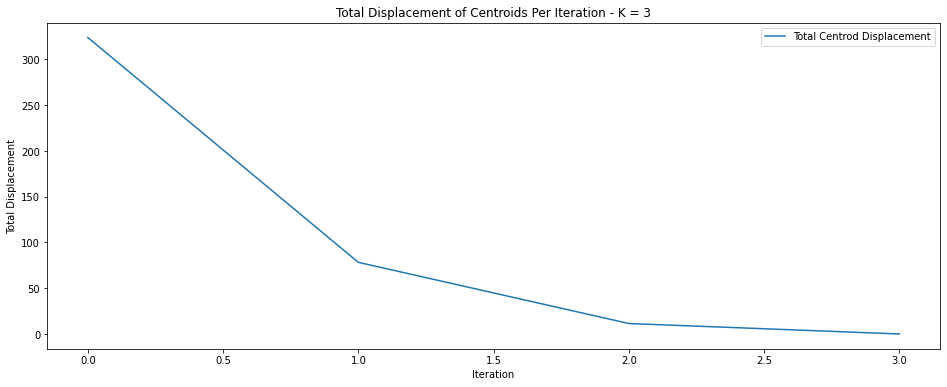

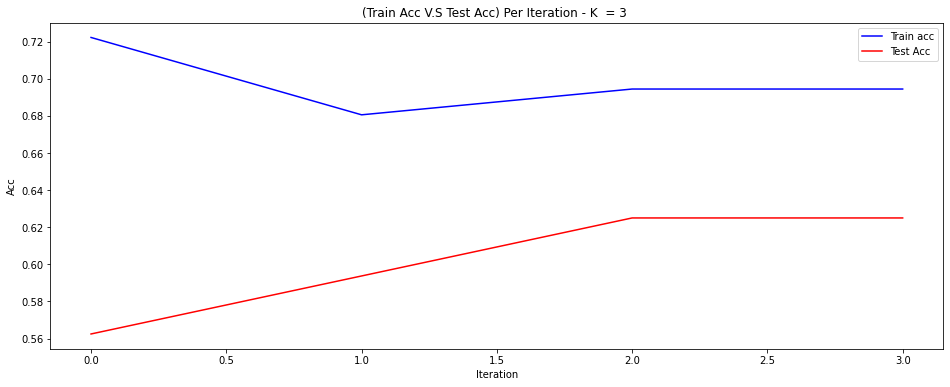

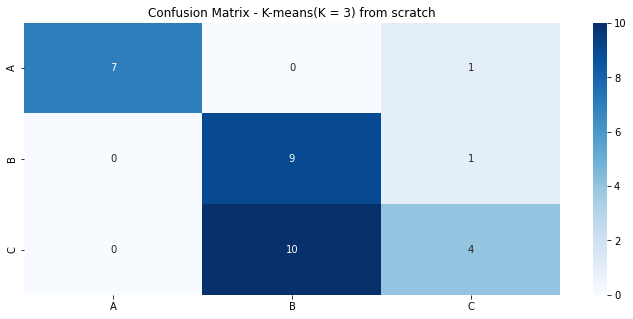

In [7]:
it = range(iteration+1)
plot_line_chart(it,Total_displacement,f"Total Displacement of Centroids Per Iteration - K = {K}","Iteration","Total Displacement","Total Centrod Displacement")
plot_two(it,Train_acc,Test_acc,f"(Train Acc V.S Test Acc) Per Iteration - K  = {K} ","Iteration","Acc","Train acc","Test Acc")

cm = confusion_matrix(test_predictions,test_labels)
show_confusion_matrix(cm,f"Confusion Matrix - K-means(K = {K}) from scratch")

<p style = "font-family:georgia;">
    <br><br><br><b><font size="5"> <font color="#D6274F" > Noramlization - Improving K-means Acc </b><font></font>
    </font>    
</p>
    

<font color= #00000><font>
    <font size="4">
<p style = "font-family:cambria;">
        <br>Normalizing Data reduces overfitting and the effect of outliers cased by certain features! Before Normalizing, <b> Features</b>  have different ranges so they <b> dont affect our data equally !</b> 
        </p>
        <font>

In [52]:
def normalize(x):
    y = (x - np.mean(x))/np.std(x)
    return y


train_data_normalized = np.zeros_like(train_data)
for i in range(np.size(train_data,1)):
    train_data_normalized[:,i] = normalize(train_data[:,i])
  
test_data_normalized = np.zeros_like(test_data)
for i in range(np.size(test_data,1)):
    test_data_normalized[:,i] = normalize(test_data[:,i])
    
clusters,centroids,Train_wcss,Test_wcss,Total_displacement,Train_acc,Test_acc,train_predictions,test_predictions,iteration  =  k_means(K,train_data_normalized,train_labels,test_data_normalized,test_labels)


Iteration No.#0


mu displacement cluster #0 = 2.250959857257048
mu displacement cluster #1 = 1.653776207901386
mu displacement cluster #2 = 2.983171710572969
total centroid displacement = 6.887907775731403



Train WCSS:2088.5047857745735
Train Acc = [0.81944444]

Test WCSS:469.72866762240335
Test Acc = [0.6875]

Total Centroid Displacement:
6.887907775731403




Iteration No.#1


mu displacement cluster #0 = 0.15899174513703618
mu displacement cluster #1 = 0.5853930443309141
mu displacement cluster #2 = 0.5971907629081505
total centroid displacement = 1.3415755523761008



Train WCSS:1752.9420737958171
Train Acc = [0.92361111]

Test WCSS:395.9725293999371
Test Acc = [0.875]

Total Centroid Displacement:
1.3415755523761008




Iteration No.#2


mu displacement cluster #0 = 0.0
mu displacement cluster #1 = 0.1152652114189819
mu displacement cluster #2 = 0.11404076850986238
total centroid displacement = 0.22930597992884427



Train WCSS:1785.4148619310572
Train Acc = [0.9375]

Test WCSS

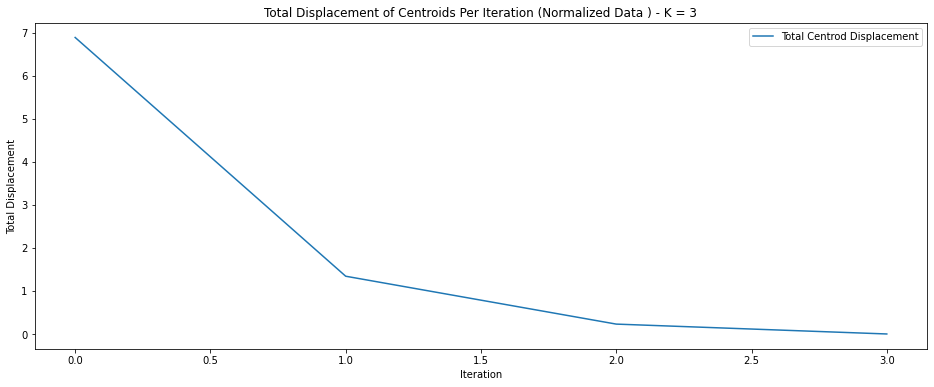

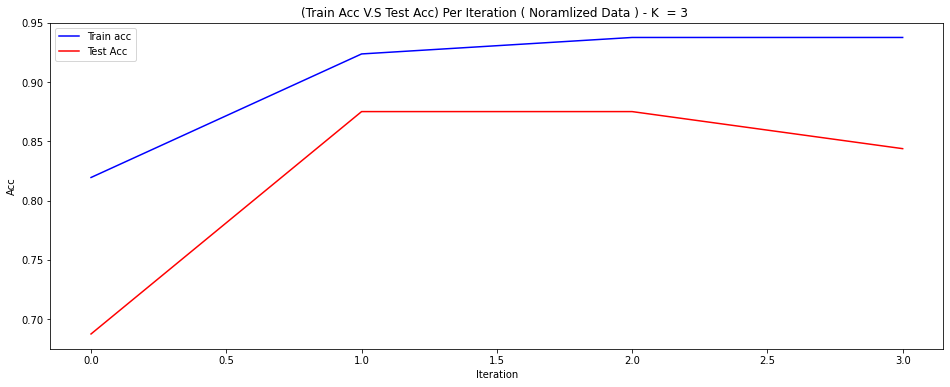

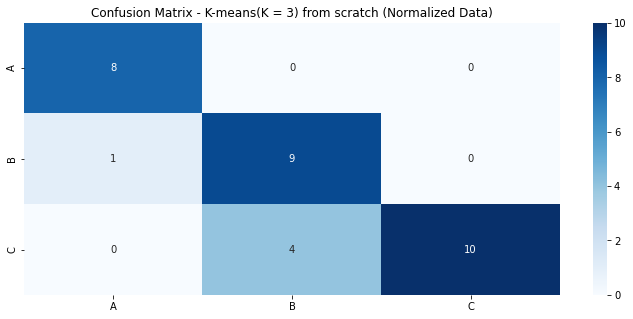

In [53]:
it = range(iteration+1)
plot_line_chart(it,Total_displacement,f"Total Displacement of Centroids Per Iteration (Normalized Data ) - K = {K}","Iteration","Total Displacement","Total Centrod Displacement")
plot_two(it,Train_acc,Test_acc,f"(Train Acc V.S Test Acc) Per Iteration ( Noramlized Data ) - K  = {K} ","Iteration","Acc","Train acc","Test Acc")

cm = confusion_matrix(test_predictions,test_labels)
show_confusion_matrix(cm,f"Confusion Matrix - K-means(K = {K}) from scratch (Normalized Data)")

<font color= #00000><font>
    <font size="4.5">
<p style = "font-family:georgia;">
    <br>We Observe that <b> Normalizing has improved Testing Acc. by 20%! </b>and this is a very good improvement! </b> 
        </p>
        <font>

<p style = "font-family:georgia;">
    <b><font size="5"> <font color="#D6274F" >  Parameter Tuning  </b><font></font>
    </font>    
</p>
    
### k_tuning ( krange, train_data, train_labels, test_data, test_labels, skl ) :

This function iterates over the <b> K_Value </b> and perform the <b> k-means </b> algorithm over normalized data. </b> It saves the Train and Test Acc. of all iterations in a list in order to plot and compare them to kind the <b> Optimal Value for K. </b> The 'skl' label is used for tuning the scikit-learn model that we will use in the next section<br><br>

In [62]:
def k_tuning(krange,train_data,train_labels,test_data,test_labels,skl="False"):
    
    Final_Train_Accs = []
    Final_Test_Accs = []
    
    for K_value in krange:
        
        if(skl=="True"):
               Train_acc,Test_acc,train_predictions,test_predictions = skl_kmeans(K_value,train_data_normalized,train_labels,test_data_normalized,test_labels)
        else:
            clusters,centroids,Train_wcss,Test_wcss,Total_displacement,Train_acc,Test_acc,train_predictions,test_predictions,iteration  =  k_means(K_value,train_data,train_labels,test_data,test_labels)
       
        Final_Train_Accs.append(Train_acc[-1])
        Final_Test_Accs.append(Test_acc[-1])
        
    print(Final_Train_Accs)
    print(Final_Test_Accs)
    return Final_Train_Accs,Final_Test_Accs

Final_Train_Accs,Final_Test_Accs = k_tuning(list(range(10))[1:9],train_data_normalized,train_labels,test_data_normalized,test_labels)


Iteration No.#0


mu displacement cluster #0 = 4.457697199682361
total centroid displacement = 4.457697199682361



Train WCSS:784.7484475739798
Train Acc = [0.43055556]

Test WCSS:177.29300795848843
Test Acc = [0.3125]

Total Centroid Displacement:
4.457697199682361




Iteration No.#1


mu displacement cluster #0 = 0.0
total centroid displacement = 0.0



Train WCSS:506.4144183277251
Train Acc = [0.43055556]

Test WCSS:113.57935742265445
Test Acc = [0.3125]

Total Centroid Displacement:
0.0






Clusterization Terminated!


Iteration No.#0


mu displacement cluster #0 = 2.496575535887628
mu displacement cluster #1 = 2.8132930306169293
total centroid displacement = 5.309868566504557



Train WCSS:1459.378832043607
Train Acc = [0.57638889]

Test WCSS:329.0802381772722
Test Acc = [0.53125]

Total Centroid Displacement:
5.309868566504557




Iteration No.#1


mu displacement cluster #0 = 0.27889245996870127
mu displacement cluster #1 = 0.18795340420283246
total centroid displacement = 0

Iteration No.#8


mu displacement cluster #0 = 0.08900496027339035
mu displacement cluster #1 = 0.0
mu displacement cluster #2 = 0.0
mu displacement cluster #3 = 0.0
mu displacement cluster #4 = 0.06667642394598017
mu displacement cluster #5 = 0.0
total centroid displacement = 0.1556813842193705



Train WCSS:3810.43611795521
Train Acc = [0.93055556]

Test WCSS:859.9826538927198
Test Acc = [0.71875]

Total Centroid Displacement:
0.1556813842193705




Iteration No.#9


mu displacement cluster #0 = 0.08439235290556414
mu displacement cluster #1 = 0.0
mu displacement cluster #2 = 0.05813855191760977
mu displacement cluster #3 = 0.0
mu displacement cluster #4 = 0.0
mu displacement cluster #5 = 0.0
total centroid displacement = 0.1425309048231739



Train WCSS:3808.009962791934
Train Acc = [0.93055556]

Test WCSS:859.445607814306
Test Acc = [0.71875]

Total Centroid Displacement:
0.1425309048231739




Iteration No.#10


mu displacement cluster #0 = 0.11587292664994285
mu displacement clus

Iteration No.#5


mu displacement cluster #0 = 0.08680624894673168
mu displacement cluster #1 = 0.0
mu displacement cluster #2 = 0.07200776480627961
mu displacement cluster #3 = 0.0
mu displacement cluster #4 = 0.0
mu displacement cluster #5 = 0.0
mu displacement cluster #6 = 0.20495890728793636
mu displacement cluster #7 = 0.0
total centroid displacement = 0.36377292104094766



Train WCSS:5149.669587993632
Train Acc = [0.90972222]

Test WCSS:1158.1179022141869
Test Acc = [0.71875]

Total Centroid Displacement:
0.36377292104094766




Iteration No.#6


mu displacement cluster #0 = 0.10458914963897939
mu displacement cluster #1 = 0.0
mu displacement cluster #2 = 0.0
mu displacement cluster #3 = 0.0
mu displacement cluster #4 = 0.0
mu displacement cluster #5 = 0.0
mu displacement cluster #6 = 0.1651196262735438
mu displacement cluster #7 = 0.0
total centroid displacement = 0.2697087759125232



Train WCSS:5147.050317934204
Train Acc = [0.91666667]

Test WCSS:1157.6480114038552
Test Acc 

Final Train Accs:

 [array([0.43055556]), array([0.56944444]), array([0.9375]), array([0.92361111]), array([0.92361111]), array([0.9375]), array([0.88194444]), array([0.91666667])]



Final Test Accs:

 [array([0.3125]), array([0.6875]), array([0.84375]), array([0.875]), array([1.]), array([0.78125]), array([0.71875]), array([0.8125])]





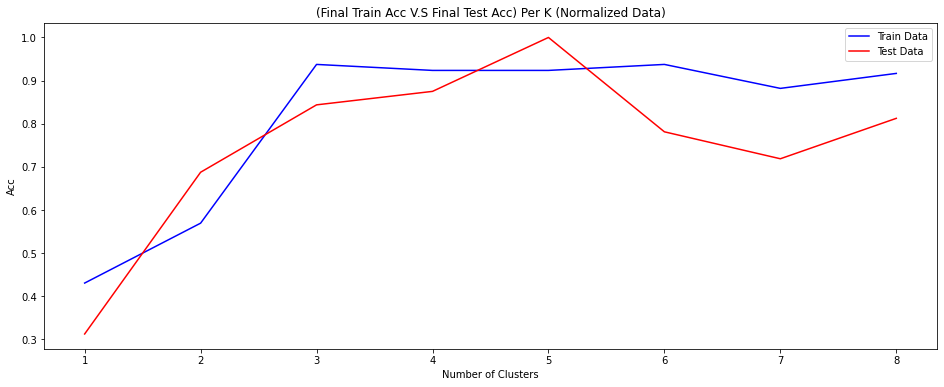

In [63]:
print(f"Final Train Accs:\n\n {Final_Train_Accs}\n\n\n") 
print(f"Final Test Accs:\n\n {Final_Test_Accs}\n\n\n")

plot_two(list(range(10))[1:9],Final_Train_Accs,Final_Test_Accs,f"(Final Train Acc V.S Final Test Acc) Per K (Normalized Data)","Number of Clusters","Acc","Train Data", "Test Data")


<font color= #00000><font>
    <font size="4">
<p style = "font-family:cambria;">
            <br>We observe that the model <b> reaches a 100% Test accuracy Surprisingly for K=5 and 87.5% for K=4 </b>. We can test the model for larger amounts of K by only extending the krange argument in the "k-tuning" function!
        </p>
        <font>

Iteration No.#0


mu displacement cluster #0 = 2.1121808440446976
mu displacement cluster #1 = 1.9512956593560637
mu displacement cluster #2 = 2.972345359088631
mu displacement cluster #3 = 2.214652224089334
mu displacement cluster #4 = 1.7687134523884336
total centroid displacement = 11.019187538967161



Train WCSS:3615.697371675969
Train Acc = [0.81944444]

Test WCSS:813.2100107573254
Test Acc = [0.8125]

Total Centroid Displacement:
11.019187538967161




Iteration No.#1


mu displacement cluster #0 = 0.08546644608213314
mu displacement cluster #1 = 0.3147884058121775
mu displacement cluster #2 = 0.391254888803877
mu displacement cluster #3 = 1.0980983286213142
mu displacement cluster #4 = 0.14359833090200583
total centroid displacement = 2.033206400221508



Train WCSS:3070.9704652796436
Train Acc = [0.90277778]

Test WCSS:691.1901907718955
Test Acc = [1.]

Total Centroid Displacement:
2.033206400221508




Iteration No.#2


mu displacement cluster #0 = 0.25574115311564605
mu disp

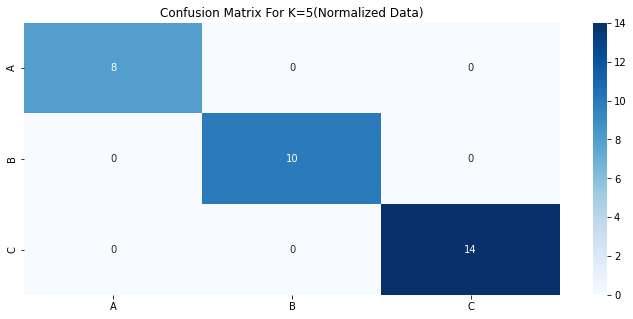

In [56]:
clusters,centroids,Train_wcss,Test_wcss,Total_displacement,Train_acc,Test_acc,train_predictions,test_predictions,iteration  =  k_means(5,train_data_normalized,train_labels,test_data_normalized,test_labels)
cm5 = confusion_matrix(test_predictions,test_labels)
show_confusion_matrix(cm5, "Confusion Matrix For K=5(Normalized Data)")

<br><br><br><br><br><p style = "font-family:georgia;">
    <b><font size="5"> <font color="#D6274F" >  B) Kmeans using scikit learn: </b><font></font>
    </font>    
</p><br>
    

Train Acc: [0.94444444]


Test Acc: [0.34375]




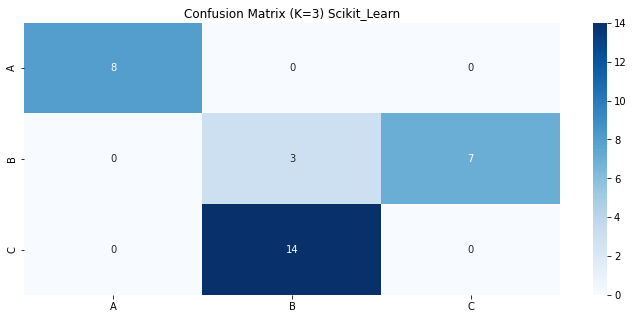

[0.4305555555555556, 0.6388888888888888, 0.9444444444444444, 0.9375, 0.9444444444444444, 0.9375, 0.9375, 0.9375]
[0.3125, 0.5, 0.34375, 0.65625, 0.53125, 0.65625, 0.40625, 0.375]


In [64]:
from sklearn.cluster import KMeans
import numpy as np

def skl_clusterize(data,K):
    
    kmeans = KMeans(n_clusters= K, random_state=0,init='random',n_init=10, max_iter=300,tol=1e-04,)
    train_cluster_index = kmeans.fit_predict(train_data_normalized)
    test_cluster_index = kmeans.fit_predict(test_data_normalized)
    
    return train_cluster_index,test_cluster_index

#train_cluster_index,test_cluster_index = skl_kmeans(train_data,3)

#train_acc,test_acc,train_predictions,test_predictions = evaluate(train_labels,test_labels,train_cluster_index,test_cluster_index)


def skl_kmeans(K,train_data,train_labels,test_data,test_labels):
    
    train_cluster_index,test_cluster_index = skl_clusterize(train_data,K)
    train_acc,test_acc,train_predictions,test_predictions = evaluate(train_labels,test_labels,train_cluster_index,test_cluster_index)
   
    return train_acc,test_acc,train_predictions,test_predictions

train_acc,test_acc,train_predictions,test_predictions = skl_kmeans(3,train_data_normalized,train_labels,test_data_normalized,test_labels)

print(f"Train Acc: {train_acc}\n\n")
print(f"Test Acc: {test_acc}\n\n")

cm_skl = confusion_matrix(test_predictions,test_labels)
show_confusion_matrix(cm_skl,"Confusion Matrix (K=3) Scikit_Learn")

Final_Train_Accs,Final_Test_Accs = k_tuning(list(range(10))[1:9],train_data_normalized,train_labels,test_data_normalized,test_labels,skl="True")  


Final Train Accs:

 [0.4305555555555556, 0.6388888888888888, 0.9444444444444444, 0.9375, 0.9444444444444444, 0.9375, 0.9375, 0.9375]



Final Test Accs:

 [0.3125, 0.5, 0.34375, 0.65625, 0.53125, 0.65625, 0.40625, 0.375]





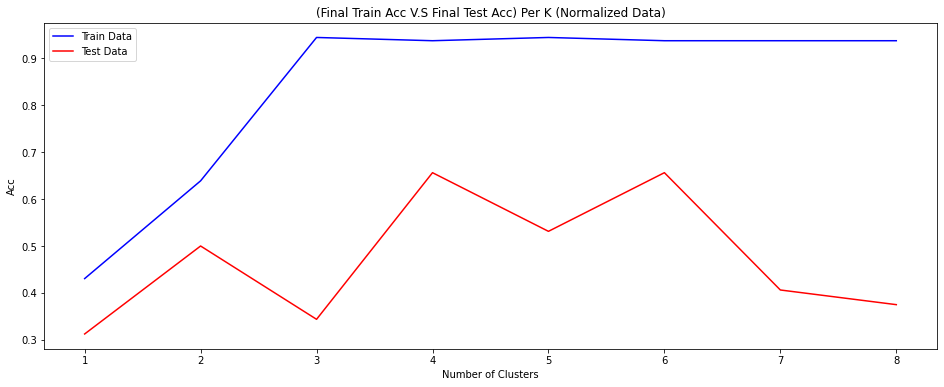

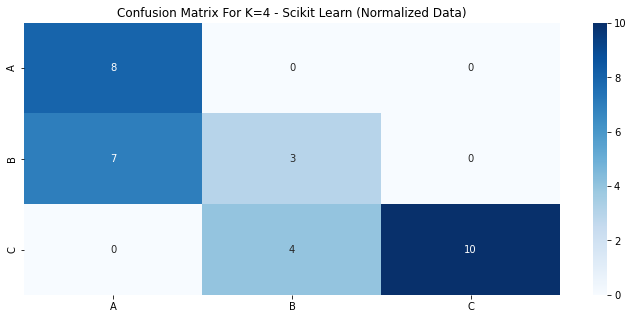

In [66]:
print(f"Final Train Accs:\n\n {Final_Train_Accs}\n\n\n") 
print(f"Final Test Accs:\n\n {Final_Test_Accs}\n\n\n")

plot_two(list(range(10))[1:9],Final_Train_Accs,Final_Test_Accs,f"(Final Train Acc V.S Final Test Acc) Per K (Normalized Data)","Number of Clusters","Acc","Train Data", "Test Data")


train_acc,test_acc,train_predictions,test_predictions  =  skl_kmeans(4,train_data_normalized,train_labels,test_data_normalized,test_labels)
cm5 = confusion_matrix(test_predictions,test_labels)
show_confusion_matrix(cm5, "Confusion Matrix For K=4 - Scikit Learn (Normalized Data)")

<font color= #00000><font>
    <font size="4">
<p style = "font-family:cambria;">
<b> Scikit-learn Surprisingly performed worse than the scratch model on test data!</b> This model reaches <b> 65.6% acc for K=4,K=6 </b> at its best performance!

<br><br><br><font color=#0C2C76 ><font>
<p style = "font-family:georgia;">
    <font size="6">
        Q2. Hierarchical Clustering (AGNES/DIANA) <br><br><font size="5"> 
    </font>    
</p>

In [69]:
import numpy as np
import matplotlib.pyplot as plt 

def distance_matrix(points,metric=2):
    print(f"\n\nIm using Minkowski Distance Metric with p =  {metric}\n\n\n")
    p = points
    print(f"Active Points:\n\n{p}\n\n\n")

    dist = np.zeros((len(p),len(p)))
    for i in range(len(p)):
        for j in range(len(p)):
            dist[i][j] = np.linalg.norm(p[i]-p[j])
    print(f"Distance matrix:\n\n {dist}\n\n\n")
    return dist

def plot_points(points,names,figure_title):
    
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111, projection='3d')
    
    p = points
    xs = [0]*len(p)
    ys = [0]*len(p)
    zs = [0]*len(p)

    for i in range(len(p)):
        xs[i] = p[i][0]
        ys[i] = p[i][1]
        zs[i] = p[i][2]

        ax.scatter(xs[i], ys[i], zs[i], marker=".",s=200)


    index = list(range(len(p)))
    for x, y, z, i in zip(xs, ys, zs, index):
        label = names[i]
        ax.text(x, y, z, label,size=20)


    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.title(figure_title)
    plt.show()
    
def vector_avg(list_of_vectors):
    avg = np.zeros(len(list_of_vectors[0]))
    for i in range(len(list_of_vectors[0])):
        avg[i] = np.sum(list_of_vectors[:,i])/len(list_of_vectors[:,i]) 
    return avg



Im using Minkowski Distance Metric with p =  2



Active Points:

[[12  9  7]
 [-2  4  4]
 [15  0  1]
 [ 3 -1  2]
 [11  4  9]]



Distance matrix:

 [[ 0.         15.16575089 11.22497216 14.35270009  5.47722558]
 [15.16575089  0.         17.72004515  7.34846923 13.92838828]
 [11.22497216 17.72004515  0.         12.08304597  9.79795897]
 [14.35270009  7.34846923 12.08304597  0.         11.74734012]
 [ 5.47722558 13.92838828  9.79795897 11.74734012  0.        ]]





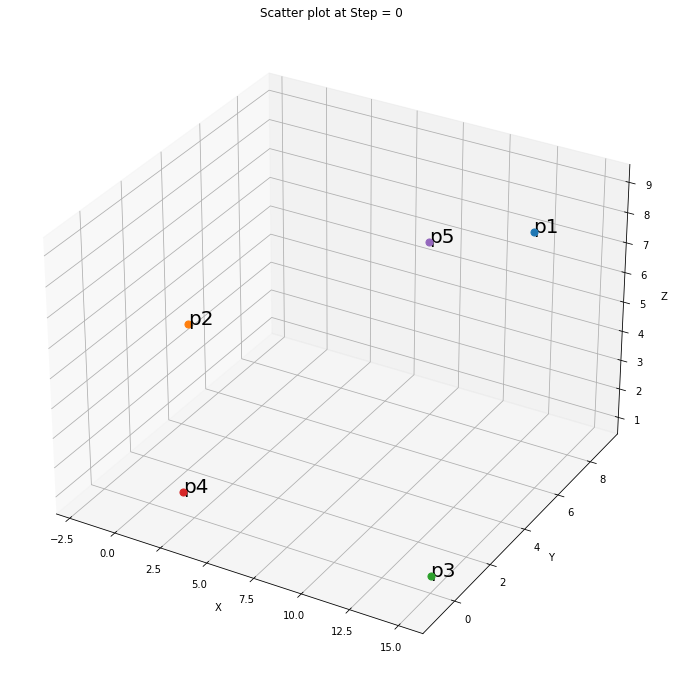

In [70]:
# defining initial points :

p1 = np.array((12,9,7))
p2 = np.array((-2,4,4))
p3 = np.array((15,0,1))
p4 = np.array((3,-1,2))
p5 = np.array((11,4,9))
p = np.array([p1,p2,p3,p4,p5])


names = ['p1','p2','p3','p4','p5']
title = 'Scatter plot at Step = 0 '
main_d  = distance_matrix(p)
plot_points(p,names,title)

<p style = "font-family:georgia;">
    <b><font size="6"> <font color="#174784" >  - AGNES ( Agglomorative Nesting Clustering ) : </b><font></font>
    </font>    
</p><br>

<p style = "font-family:georgia;">
    <b><font size="5"> <font color="#D6274F" >  A) Centroid-Based Distance : </b><font></font>
    </font>    
</p><br>
    
<p style = "font-family:georgia;">
    <b><font size="4"> <font color="#A3678F" >  First Hierarchy Level  </b><font></font>
    </font>    
</p><br><br>
    
<font color= #00000><font>
<p style = "font-family:cambria;">
    <font size="3">
        As we can see <b> p1 & p5 </b>  have the least distance from eachother so we merge them into a cluster <b> (C15)</b><br><br><b> p2, p3, p4 remain single</b>  in the first level <br><br>
        </p>
        
<p style = "font-family:georgia;">
    <b><font size="3"> <font color="#6D81B9" >  Calculating centroid: </b><font></font>
    </font>    
        </p>
    




Im using Minkowski Distance Metric with p =  2



Active Points:

[array([-2,  4,  4]), array([15,  0,  1]), array([ 3, -1,  2]), array([11.5,  6.5,  8. ])]



Distance matrix:

 [[ 0.         17.72004515  7.34846923 14.30034965]
 [17.72004515  0.         12.08304597 10.17349497]
 [ 7.34846923 12.08304597  0.         12.82575534]
 [14.30034965 10.17349497 12.82575534  0.        ]]





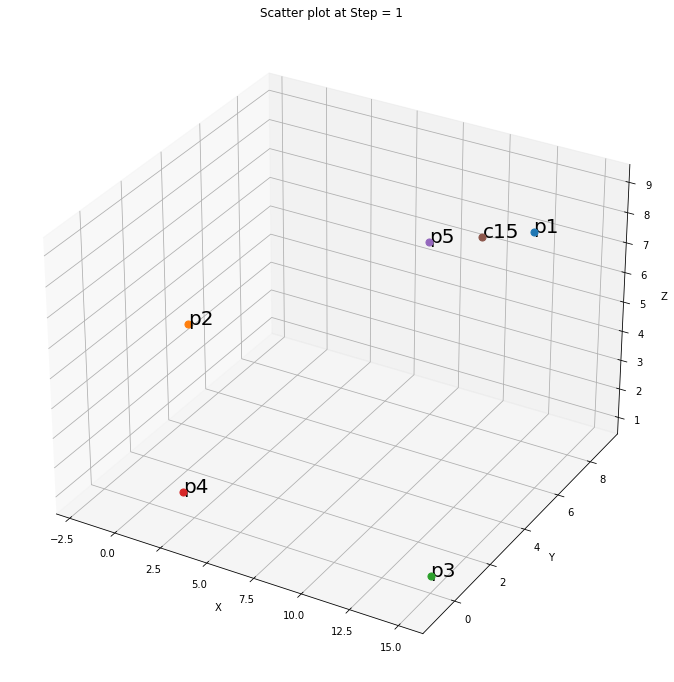

In [71]:
c15 = (p[0]+p[4])/2
points = [p[0],p[1],p[2],p[3],p[4],c15]
active_points = [p[1],p[2],p[3],c15]
distance_matrix(active_points)
names = ['p1','p2','p3','p4','p5','c15']
title = 'Scatter plot at Step = 1 '
plot_points(points,names,title)

<p style = "font-family:georgia;">
    <b><font size="4"> <font color="#A3678F" >  Second Hierarchy Level  </b><font></font>
    </font>    
</p><br><br>
    
    
<font color= #00000><font>
<p style = "font-family:cambria;">
    <font size="3">
        As we can see <b> p2 & p4 </b>  have the least distance from eachother so we merge them into a cluster <b> (C24)</b><br><br><b> C15, p3 remain single</b>  in the second level <br><br>
        </p>
        
<p style = "font-family:georgia;">
    <b><font size="3"> <font color="#6D81B9" >  Calculating centroid: </b><font></font>
    </font>    
        </p>
    



Im using Minkowski Distance Metric with p =  2



Active Points:

[array([15,  0,  1]), array([11.5,  6.5,  8. ]), array([0.5, 1.5, 3. ])]



Distance matrix:

 [[ 0.         10.17349497 14.71393897]
 [10.17349497  0.         13.07669683]
 [14.71393897 13.07669683  0.        ]]





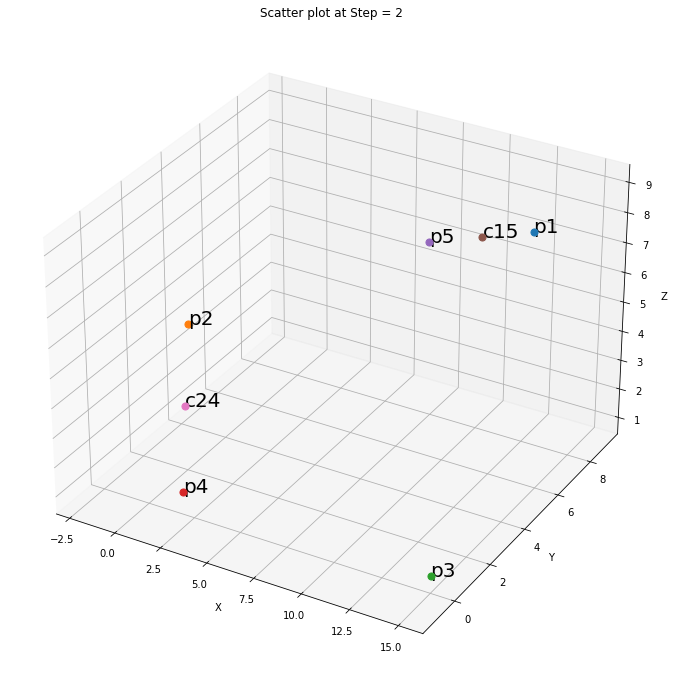

In [72]:
c24 = (p[1]+p[3])/2
points = [p[0],p[1],p[2],p[3],p[4],c15,c24]
active_points = [p[2],c15,c24]
distance_matrix(active_points)
names = ['p1','p2','p3','p4','p5','c15', 'c24']
title = 'Scatter plot at Step = 2 '
plot_points(points,names,title)

<p style = "font-family:georgia;">
    <b><font size="4"> <font color="#A3678F" >  Third Hierarchy Level  </b><font></font>
    </font>    
</p><br><br>
    
    
<font color= #00000><font>
<p style = "font-family:cambria;">
    <font size="3">
        As we can see <b> C15 & p3 </b>  have the least distance from eachother so we merge them into a cluster <b> (C153)</b><br><br><b> C24 remains single</b>  in the third level <br><br>
        </p>
        
<p style = "font-family:georgia;">
    <b><font size="3"> <font color="#6D81B9" >  Calculating centroid: </b><font></font>
    </font>    
        </p>
    



Im using Minkowski Distance Metric with p =  2



Active Points:

[array([0.5, 1.5, 3. ]), array([12.66666667,  4.33333333,  5.66666667])]



Distance matrix:

 [[ 0.         12.77367084]
 [12.77367084  0.        ]]





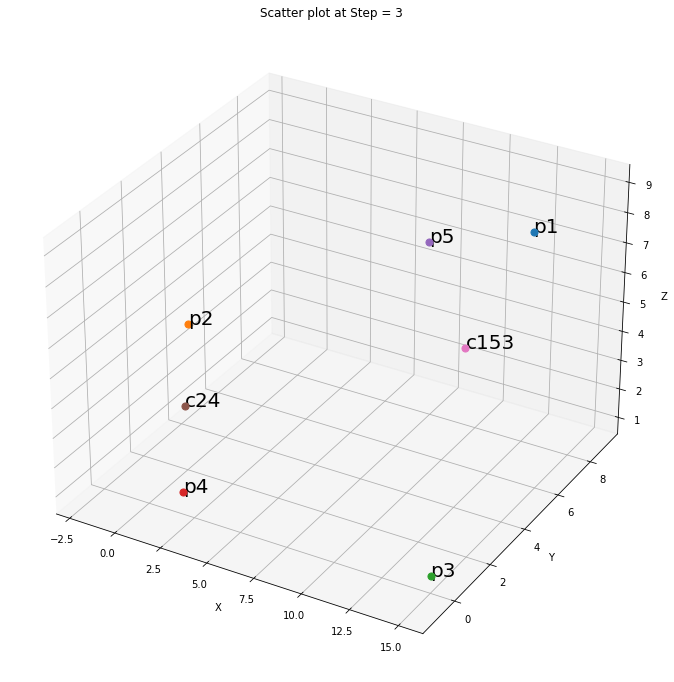

In [73]:
c153 = (p[0]+p[4]+p[2])/3
points = [p[0],p[1],p[2],p[3],p[4],c24,c153]
active_points = [c24,c153]
distance_matrix(active_points)
names = ['p1','p2','p3','p4','p5','c24','c153']
title = 'Scatter plot at Step = 3 '
plot_points(points,names,title)

<p style = "font-family:georgia;">
    <b><font size="4"> <font color="#A3678F" >  Fourth Hierarchy Level  </b><font></font>
    </font>    
</p><br><br>
    
    
<font color= #00000><font>
<p style = "font-family:cambria;">
    <font size="3">
        The two remaining clusters <b> (C153,C24)</b>  merge into one another and form <b> The Total Cluster (C15324)</b>
        <br><br>
        </p>
        
<p style = "font-family:georgia;">
    <b><font size="3"> <font color="#6D81B9" >  Calculating centroid: </b><font></font>
    </font>    
        </p>
    

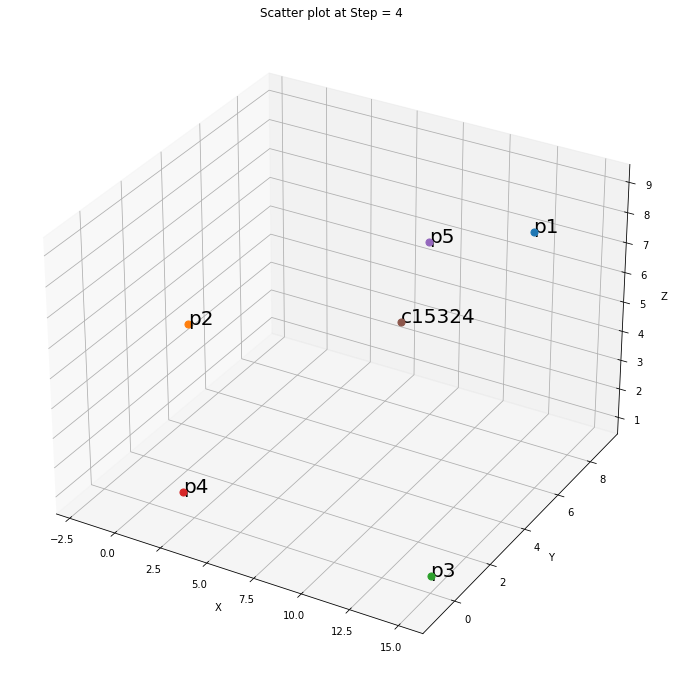

In [75]:
c15324 = (p1+p5+p3+p2+p5)/5
points = [p[0],p[1],p[2],p[3],p[4],c15324]
names = ['p1','p2','p3','p4','p5','c15324']
title = 'Scatter plot at Step = 4 '
plot_points(points,names,title)

<p style = "font-family:georgia;">
    <b><font size="5"> <font color="#D6274F" >  B) Complete-Link Distance : </b><font></font>
    </font>    
</p><br>


<p style = "font-family:georgia;">
    <b><font size="3.5"> <font color="#174784" >  The first level hierarchy is like the previous part because we only have single points at the beginning  </b><font></font>
    </font>    
</p><br><br>



Im using Minkowski Distance Metric with p =  2



Active Points:

[[12  9  7]
 [-2  4  4]
 [15  0  1]
 [ 3 -1  2]
 [11  4  9]]



Distance matrix:

 [[ 0.         15.16575089 11.22497216 14.35270009  5.47722558]
 [15.16575089  0.         17.72004515  7.34846923 13.92838828]
 [11.22497216 17.72004515  0.         12.08304597  9.79795897]
 [14.35270009  7.34846923 12.08304597  0.         11.74734012]
 [ 5.47722558 13.92838828  9.79795897 11.74734012  0.        ]]





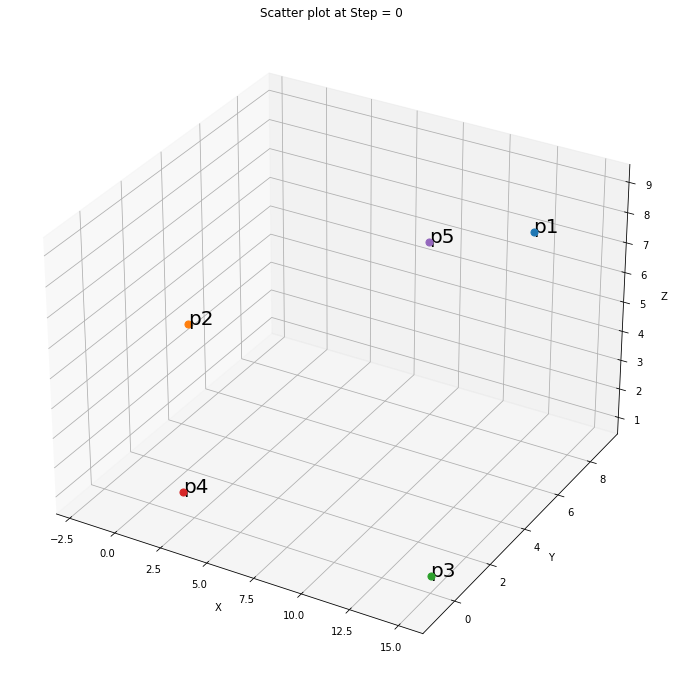

In [76]:
names = ['p1','p2','p3','p4','p5']
title = 'Scatter plot at Step = 0 '
distance_matrix(p)
plot_points(p,names,title)

$${\displaystyle \mathit Distance\;Matrix\,(\,Step\,0\,)\,={\begin{bmatrix}{d_{11}}&{d_{12}}&{d_{13}}&{d_{14}}&{\color{purple}{\boxed{d_{15}}}}\\{d_{21}}&{d_{22}}&{d_{23}}&{d_{24}}&{d_{25}}\\{d_{31}}&{d_{32}}&{d_{33}}&{d_{34}}&{d_{35}}\\{d_{41}}&{d_{42}}&{d_{43}}&{d_{44}}&{d_{45}}\\{d_{51}}&{d_{52}}&{d_{53}}&{d_{54}}&{d_{55}}\end{bmatrix}}\;={\begin{bmatrix}{0}&{15.17}&{11.22}&{14.35}&{\color{purple}{5.48}}\\{...}&{0}&{17.72}&{7.35}&{13.93}\\{...}&{...}&{0}&{12.08}&{9.80}\\{...}&{...}&{...}&{0}&{11.75}\\{...}&{...}&{...}&{...}&{0}\end{bmatrix}}}$$

        
<p style = "font-family:georgia;">
    <b><font size="4"> <font color="#A3678F" >  First Hierarchy Level  </b><font></font>
    </font>    
</p><br>

<p style = "font-family:georgia;">
    <b><font size="3"> <font color="#A3678F" >  Merging State:  </b><font></font>
    </font>    
</p>
    
<font color= #00000><font>
<p style = "font-family:cambria;">
    <font size="3">
        As we can see <b> p1 & p5 </b>  have the least distance from eachother so we merge them into a cluster <b> (C15)</b><br><br><b> p2, p3, p4 remain single</b>  in the first level <br><br>
        </p>
        
<p style = "font-family:georgia;">
    <b><font size="3"> <font color="#841717" ><b>  Centroids dont have any contribution to calculations in this distance measure but they are shown as a representive of their corresponding cluster! </b><font></font>
    </font>    
        </p>

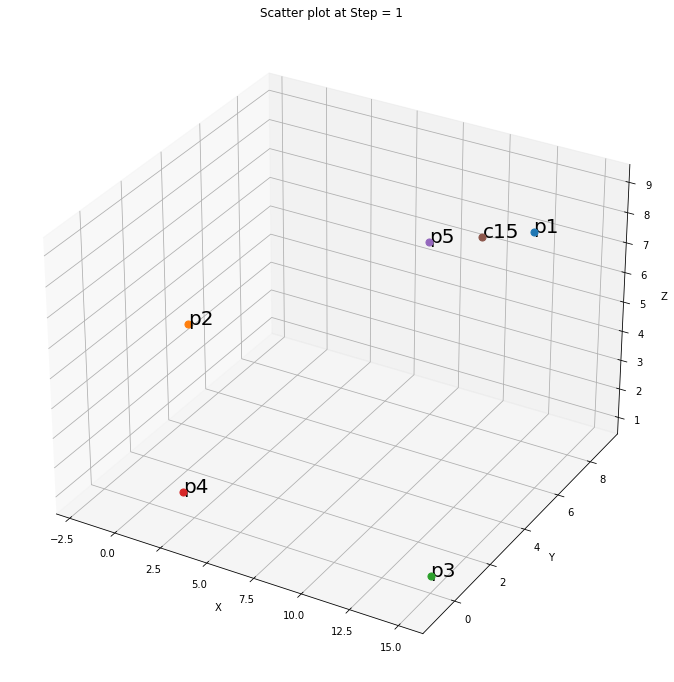

In [77]:
c15 = (p[0]+p[4])/2
points = [p[0],p[1],p[2],p[3],p[4],c15]
names = ['p1','p2','p3','p4','p5','c15']
title = 'Scatter plot at Step = 1 '
plot_points(points,names,title)

<p style = "font-family:georgia;">
    <b><font size="4"> <font color="#A3678F" >  Second Hierarchy Level  </b><font></font>
    </font>    
</p><br>
    
<font color= #00000><font>
<p style = "font-family:cambria;">
    <font size="3">
        We should look at the <b> main distance matrix </b> calculated in the <b> First level</b> <br>Next we should <b> observe the distance values between each point in cluster 'c15'</b>  and <b> other points</b><br></b>So we <b> compare distance values</b>  placed in<b>  row 1 with the distance values in row 5 </b> and <b> pick the maximum colomnwise </b> <br><br>In each case I have shown the <b> complete link</b> (maximum distance link) with other points in <b> red </b> and <b> other links in blue!<br><br></b></b>
        </p>

    
$${\displaystyle \mathit Distance\;Matrix\,(\,Step\,0\,)\,={\begin{bmatrix}{d_{11}}&{\color{Red}{d_{12}}}&{\color{Red}{d_{13}}}&{\color{Red}{d_{14}}}&{d_{15}}\\{d_{21}}&{d_{22}}&{d_{23}}&{d_{24}}&{\color{Blue}{d_{25}}}\\{d_{31}}&{d_{32}}&{d_{33}}&{d_{34}}&{\color{Blue}{d_{35}}}\\{d_{41}}&{d_{42}}&{d_{43}}&{d_{44}}&{\color{Blue}{d_{45}}}\\{d_{51}}&{d_{52}}&{d_{53}}&{d_{54}}&{d_{55}}\end{bmatrix}}\;={\begin{bmatrix}{0}&{\color{Red}{15.17}}&{\color{Red}{11.22}}&{\color{Red}{14.35}}&{5.48}\\{...}&{0}&{17.72}&{7.35}&{\color{Blue}{13.93}}\\{...}&{...}&{0}&{12.08}&{\color{Blue}{9.80}}\\{...}&{...}&{...}&{0}&{\color{Blue}{11.75}}\\{...}&{...}&{...}&{...}&{0}\end{bmatrix}}}$$
    

<font color= #00000><font>
<p style = "font-family:cambria;">
    <font size="3">
        <br><br>It turns out that as <b> the point 'P5' is further from all the other points than 'P1'</b> , We can <b> replace</b>  the <b> distance of cluster 'C15'</b>  from all the other points with the <b> distance of the 'P1' with them !</b>  </b>
        </p>


    


    
$${\boxed{\mathit{d_{C15,\,p2} = max\,(\,d_{p1,\,p2},d_{p5,\,p2}\,) \,=\, d_{p1,\,p2}}\\\\\mathit{d_{C15,\,p3} = max\,(\,d_{p1,\,p3},d_{p5,\,p3}\,)\,=\,d_{p1,\,p3}}\\\\\mathit{d_{C15,\,p3} = max\,(\,d_{p1,\,p4},d_{p5,\,p4}\,)\,=\,d_{p1,\,p4}}}}$$

<p style = "font-family:georgia;">
    <font size="3"> <font color="#BF1C1C" ><br><br>There's no need to calculate the distance matrix without P5 again!<br><b>We just replace the cluster distances with P1 distance</b> and <b>form the new distance matrix!<br><br><br>$$\boxed{\textbf{ The next Cluster distances to 'C15' can also be replaced by their pairwise point distances to 'p1'}}$$</b> </b><br><br><font></font>
    </font>    
        </p>
    

<font color= #00000><font>
<p style = "font-family:cambria;">
    <font size="3">
        <br><b>So we can just eliminate the last row and colomn of the previous matrix to rach the new one!</b>  </b>
        </p>
    
$${\displaystyle \mathit Distance\;Matrix\,(\,Step1\,)={\begin{bmatrix}{d_{C_{15}C_{15}}}&{d_{C_{15}2}}&{d_{C_{15}3}}&{d_{C_{15}4}}\\{d_{2C_{15}}}&{d_{22}}&{d_{23}}&{\color{purple}{\boxed{d_{24}}}}\\{d_{3C_{15}}}&{d_{32}}&{d_{33}}&{d_{34}}\\{d_{4C_{15}}}&{d_{42}}&{d_{43}}&{d_{44}}\end{bmatrix}}\;={\begin{bmatrix}{0}&{15.17}&{11.22}&{14.35}\\{...}&{0}&{17.72}&{\color{purple}{7.35}}\\{...}&{...}&{0}&{12.08}\\{...}&{...}&{...}&{0}\end{bmatrix}}}$$

    

<p style = "font-family:georgia;">
    <b><font size="3"> <font color="#A3678F" >  Merging State:  </b><font></font>
    </font>    
</p>
    
<p style = "font-family:georgia;">
    <font size="3"> <font color="#00000" ><br>The <b> distance between p2,p4 is the least distance among points</b> so they merge and form the <b> cluster 'C24"</b> in Step2</b><br><br><font></font>
    </font>    
        </p>

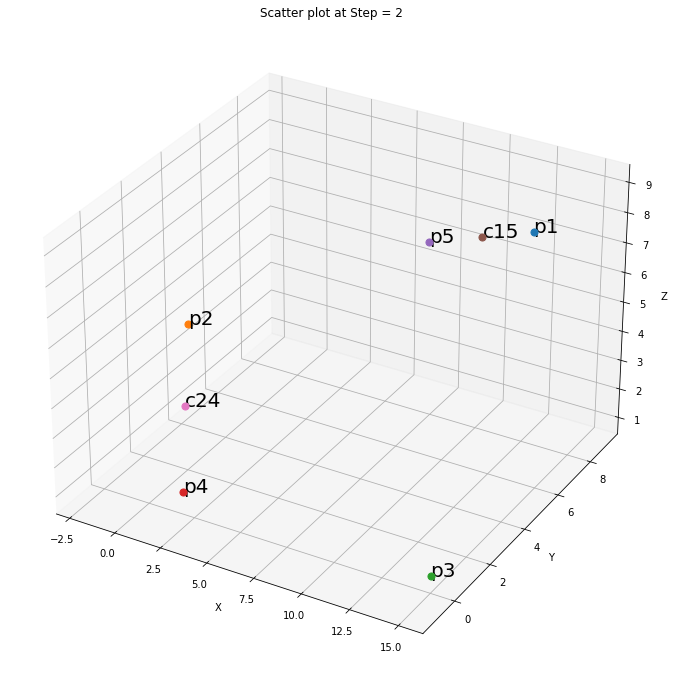

In [78]:
c24 = (p[1]+p[3])/2
points = [p[0],p[1],p[2],p[3],p[4],c15,c24]
names = ['p1','p2','p3','p4','p5','c15', 'c24']
title = 'Scatter plot at Step = 2 '
plot_points(points,names,title)

<p style = "font-family:georgia;">
    <b><font size="4"> <font color="#A3678F" >  Third Hierarchy Level  </b><font></font>
    </font>    
</p><br>

<font color= #00000><font>
<p style = "font-family:cambria;">
    <font size="3">
<br>Like the previous step we should <b> observe the distance values between each point in cluster 'c24'</b>  and <b> other points</b><br></b>So we <b> compare distance values</b>  placed in<b>  row(colomn) 2 with the distance values in row(column) 4 </b> and <b> pick the maximum colomnwise </b> <br><br>In each case I have shown the <b> complete link</b> (maximum distance link) with other points in <b> red </b> and <b> other links in blue!<br><br></b></b>


$${\displaystyle \mathit Distance\;Matrix\,(\,Step\,1\,)={\begin{bmatrix}{d_{C_{15}C_{15}}}&{\color{red}{d_{C_{15}2}}}&{d_{C_{15}3}}&{\color{Blue}{d_{C_{15}4}}}\\{d_{2C_{15}}}&{d_{22}}&{\color{Red}{d_{23}}}&{d_{24}}\\{d_{3C_{15}}}&{d_{32}}&{d_{33}}&{\color{Blue}{d_{34}}}\\{d_{4C_{15}}}&{d_{42}}&{d_{43}}&{d_{44}}\end{bmatrix}}\;={\begin{bmatrix}{0}&{\color{Red}{15.17}}&{11.22}&{\color{Blue}{14.35}}\\{...}&{0}&{\color{Red}{17.72}}&{7.35}\\{...}&{...}&{0}&{\color{Blue}{12.08}}\\{...}&{...}&{...}&{0}\end{bmatrix}}}$$
    
    
<font color= #00000><font>
<p style = "font-family:cambria;">
    <font size="3">
        <br><br>It turns out that as <b> the point 'P2' is further from all the other points than 'P4'</b> , We can <b> replace</b>  the <b> distance of cluster 'C24'</b>  from all the other points with the <b> distance of the 'P2' with them !</b>  </b>
        </p>


    
$${\boxed{\mathit{d_{C24,\,C15} = max\,(\,d_{p2,\,C15},d_{p4,\,p2}\,) \,=\, \,d_{p2,\,C15}}\\\\\mathit{d_{C24,\,p3} = max\,(\,d_{p2,\,p3},d_{p4,\,p3}\,)\,=\,d_{p2,\,p3}}}}$$

<p style = "font-family:georgia;">
    <font size="3"> <font color="#BF1C1C" ><br><br>There's no need to calculate the distance matrix without P4 again!<br><b>We just replace the cluster distances with P2 distance</b> and <b>form the new distance matrix!<br><br><br>$$\boxed{\textbf{ The next Cluster distances to 'C24' can also be replaced by their pairwise point distances to 'p2'}}$$</b> </b><br><br><font></font>
    </font>    
        </p>
    
    

$${\displaystyle \mathit Distance\;Matrix\,(\,Step\,2\,)={\begin{bmatrix}{d_{C_{15}C_{15}}}&{d_{C_{15}C_{24}}}&{\color{purple}{\boxed{d_{C_{15}3}}}}\\{d_{C_{24}C_{15}}}&{d_{C_{24}C_{24}}}&{d_{C_{24}3}}\\{d_{3C_{15}}}&{d_{3C_{24}}}&{d_{33}}\\\end{bmatrix}}\;={\begin{bmatrix}{0}&{15.17}&{\color{purple}{\boxed{11.22}}}\\{...}&{0}&{17.72}\\{...}&{...}&{0}\end{bmatrix}}}$$
    
<p style = "font-family:georgia;">
    <br><b><font size="3"> <font color="#A3678F" >  Merging State:  </b><font></font>
    </font>    
</p>
    
    
<p style = "font-family:georgia;">
    <font size="3"> <font color="#00000" ><br>The <b> distance between C15,p3 is the least distance among others</b> so they merge and form the <b> cluster 'C153"</b> in Step3</b><br><br><font></font>
    </font>    
        </p>

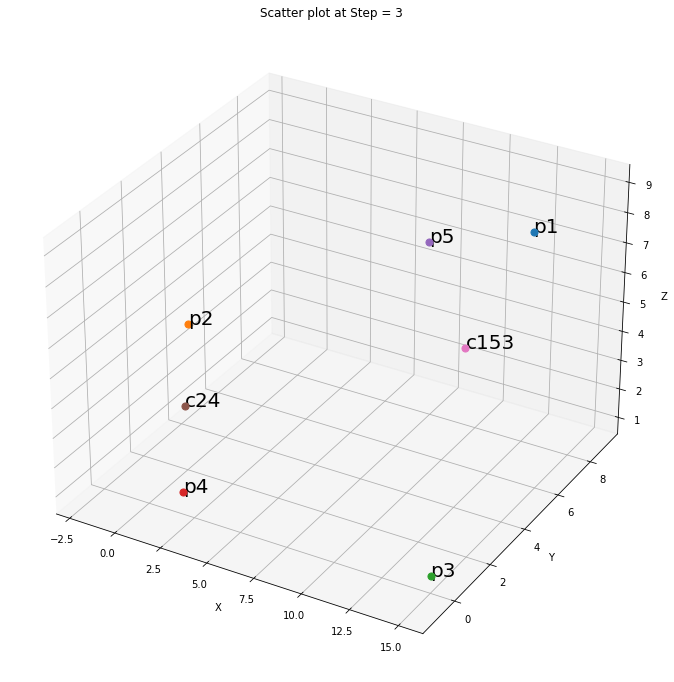

In [80]:
c153 = (p[0]+p[2]+p[4])/3
points = [p[0],p[1],p[2],p[3],p[4],c24,c153]
names = ['p1','p2','p3','p4','p5','c24', 'c153']
title = 'Scatter plot at Step = 3 '
plot_points(points,names,title)

<p style = "font-family:georgia;">
    <b><font size="4"> <font color="#A3678F" >  Fourth Hierarchy Level  </b><font></font>
    </font>    
</p>

<font color= #00000><font>
<p style = "font-family:cambria;">
    <font size="3">
<br>This step is the last step and so the merging process is completely clear! <b> 'c24' and 'c153'</b>  the only remaining objects should merge into one another and form <b> 'c15324'<b> ( The Grand Cluster ) <br>


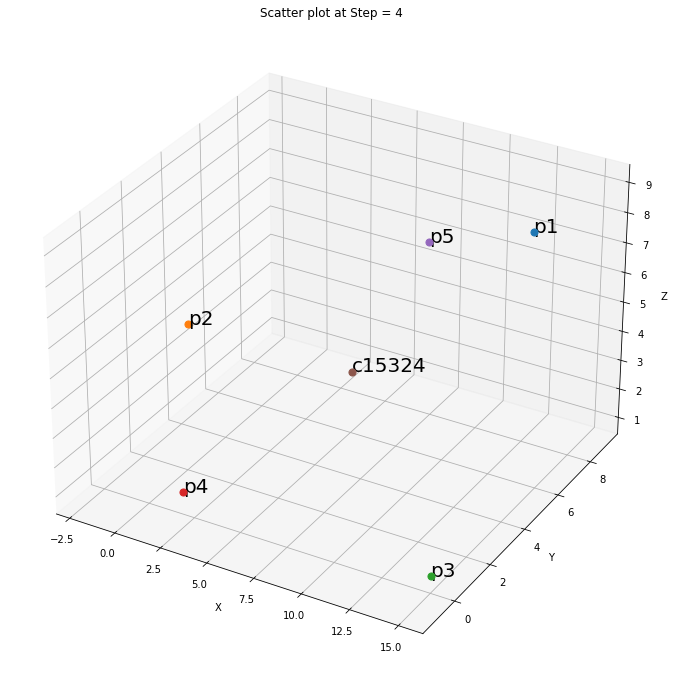

In [81]:
c15324 = (p[0]+p[1]+p[2]+p[3]+p[4])/5
points = [p[0],p[1],p[2],p[3],p[4],c15324]
names = ['p1','p2','p3','p4','p5','c15324']
title = 'Scatter plot at Step = 4 '
plot_points(points,names,title)

<br><br><br><p style = "font-family:georgia;">
    <b><font size="6"> <font color="#174784" >  - DIANA ( Divise Analysis ) : </b><font></font>
    </font>    
</p><br>
    
<p style = "font-family:georgia;">
    <b><font size="5"> <font color="#D6274F" >  A) Single-Link Distance : </b><font></font>
    </font>    
</p><br>
    
<p style = "font-family:georgia;">
    <b><font size="4"> <font color="#A3678F" >  First Hierarchy Level  </b><font></font>
    </font>    
</p>
    
    
<font color= #00000><font>
<p style = "font-family:cambria;">
    <font size="3">
        <br>In <b> DIANA </b> algorithm, we first have a <b> Total Cluster</b>  involving all the points <br>


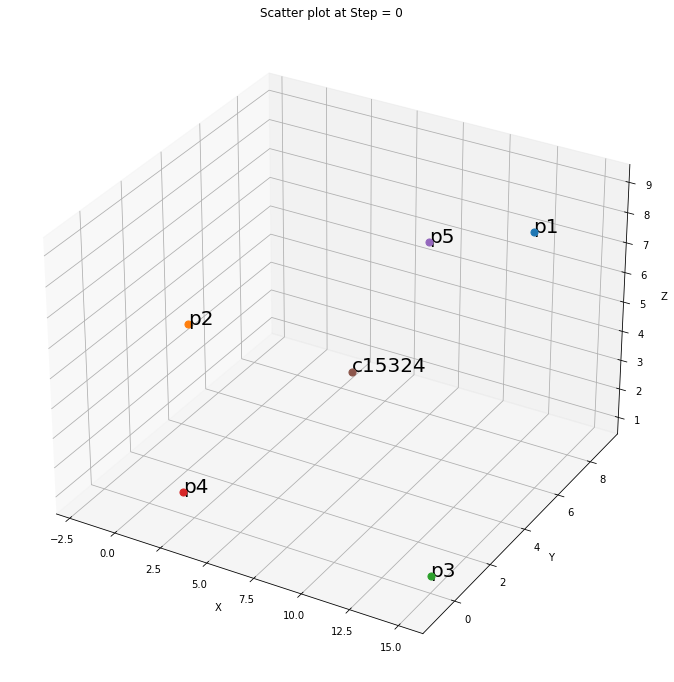

In [82]:
c12345 = (p[0]+p[1]+p[2]+p[3]+p[4])/5
points = [p[0],p[1],p[2],p[3],p[4],c12345]
names = ['p1','p2','p3','p4','p5','c15324']
title = 'Scatter plot at Step = 0 '
plot_points(points,names,title)

<font color= #00000><font>
<p style = "font-family:cambria;">
    <font size="3">
        <br>We should <b> find the most dissimilar point</b> in the total cluster and </b> seperate it from others. We <b> dont have at least two objects</b>  so we <b> ignore the single link measure </b>  <br>

    
<p style = "font-family:georgia;">
    <font size="3"> <font color="#BF1C1C" ><br><b> But, how should we choose the most dissimilar point?</b>
    </font>    
        </p>
    
<font color= #00000><font>
<p style = "font-family:cambria;">
    <font size="3">
        <br>We should pick <b> the point that has the maximium single linkage ( minimum ) distance from other points<b>  as the most <b> dissimalar point </b>  <br>


$${\displaystyle \mathit Distance\;Matrix\,(\,Step\,0\,)\,={\begin{bmatrix}{d_{11}}&{d_{12}}&{d_{13}}&{d_{14}}&{d_{15}}\\{d_{21}}&{d_{22}}&{d_{23}}&{d_{24}}&{d_{25}}\\{d_{31}}&{d_{32}}&{d_{33}}&{d_{34}}&{d_{35}}\\{d_{41}}&{d_{42}}&{d_{43}}&{d_{44}}&{d_{45}}\\{d_{51}}&{d_{52}}&{d_{53}}&{d_{54}}&{d_{55}}\end{bmatrix}}\;={\begin{bmatrix}{0}&{15.17}&{11.22}&{14.35}&{{5.48}}\\{...}&{0}&{17.72}&{7.35}&{13.93}\\{...}&{...}&{0}&{12.08}&{9.80}\\{...}&{...}&{...}&{0}&{11.75}\\{...}&{...}&{...}&{...}&{0}\end{bmatrix}}}$$
<br><br>
$\textit{Taking min over rows (or colomns)}$
$\mathit{\Rightarrow}$
$\mathbf{\boxed{d_{1} = min\,(\,d_{1i}\,)}}$
<br><br>



$${\displaystyle Single\;Link\;Distance\;Vector = \mathbf {\begin{bmatrix}{{d}}_{1}\\{{d}_{2}}\\{\color{purple}{ {d}_{3}}}\\{{d}}_{4}\\{{d}}_{5}\end{bmatrix}} = \mathbf {\begin{bmatrix}{5.48}\\{7.35}\\{\color{purple}{9.80}}\\{7.35}\\{5.48}\end{bmatrix}}}$$

<font color= #00000><font>
<p style = "font-family:cambria;">
    <font size="3">
        <br><b> p3</b> is is the <b> most dissimilar</b> point among others ( with respect to the<b>  single linkage measure </b> ). so we <b> seperate it from others</b><br><br>Now we should <b> repeat the Algorithm again but compare the single linkage distances with p3 distance</b><br><br>So we <b> eliminate the 3'rd row and column </b> from the <b> main distance matrix. </b> <br>
        <font>
        </p>
        
$${\displaystyle \mathit Distance\;Matrix\,(\,Step\,0\,)\,={\begin{bmatrix}{d_{11}}&{d_{12}}&{d_{14}}&{d_{15}}\\{d_{21}}&{d_{22}}&{d_{24}}&{d_{25}}\\{d_{41}}&{d_{42}}&{d_{44}}&{d_{45}}\\{d_{51}}&{d_{52}}&{d_{54}}&{d_{55}}\end{bmatrix}}\;={\begin{bmatrix}{0}&{15.17}&{14.35}&{{5.48}}\\{...}&{0}&{7.35}&{13.93}\\{...}&{...}&{0}&{11.75}\\{...}&{...}&{...}&{0}\end{bmatrix}}}$$
<br><br>

$\textit{Taking min over rows (or colomns)}$
$\mathit{\Rightarrow}$
$\mathbf{\boxed{d_{1} = min\,(\,d_{1i}\,)}}$
<br><br>
        
$${\displaystyle Single\;Link\;Distance\;Vector = \mathbf {\begin{bmatrix}{{d}}_{1}\\{\color{purple}{{d}_{2}}}\\{\color{purple}{{d}_{4}}}\\{{d}}_{5}\end{bmatrix}} = \mathbf {\begin{bmatrix}{5.48}\\{\color{purple}{7.35}}\\{\color{purple}{7.35}}\\{5.48}\end{bmatrix}}}$$
        
        
<font color= #00000><font>
<p style = "font-family:cambria;">
    <font size="3">
        <br><b> p2 and p4 </b> are both the <b> most disimilar objects in the 'C1245"</b>  cluster! We should <b> compare their within cluster distance with their distance from p3 thats out of the cluster</b> , and decide whether to seperate it or not.</b> <br>
        <font>
        </p>
    
$${\mathit{\boxed{d_{2}<d_{23}\\d_{4}<d_{43}}}}$$
    
    
<font color= #BF1C1C><font>
<p style = "font-family:cambria;">
    <font size="3">
        <br><b> So <b> p3 </b> is seperated alone in this step and we move on to our next hierarchical step.</b> <br>
        <font>
    </p>
        
        

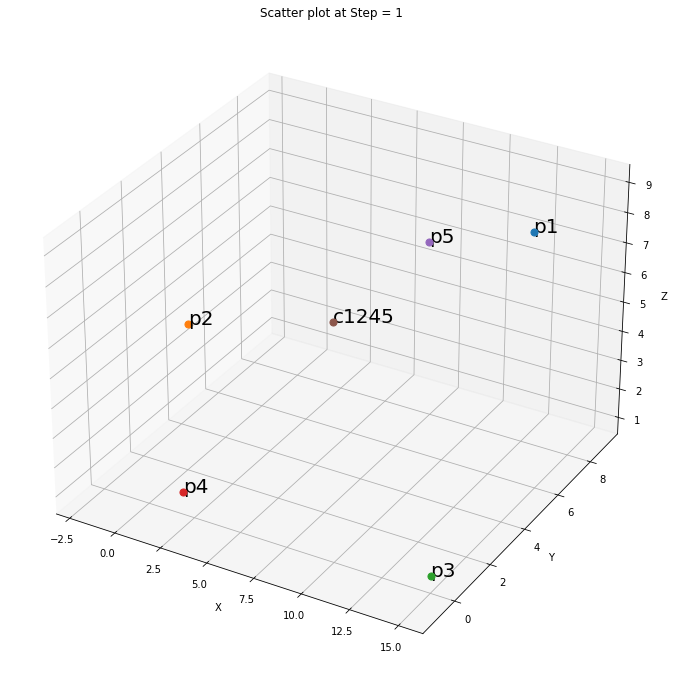

In [83]:
c1245 = (p[0]+p[1]+p[3]+p[4])/4
points = [p[0],p[1],p[2],p[3],p[4],c1245]
names = ['p1','p2','p3','p4','p5','c1245']
title = 'Scatter plot at Step = 1 '
plot_points(points,names,title)

<p style = "font-family:georgia;">
    <b><font size="4"> <font color="#A3678F" >  Second Hierarchy Level  </b><font></font>
    </font>    
</p>
    
    
<font color= #00000><font>
<p style = "font-family:cambria;">
    <font size="3">
        <br>We should <b> find the most dissimilar point</b> in 'C1234' cluster and </b> seperate it from others. We use <b> single link distance measure </b> for within cluster distnances<br>


    
<font color= #00000><font>
<p style = "font-family:cambria;">
    <font size="3">
        <br>We should pick <b> the point that has the maximium single linkage ( minimum ) distance from other points</b>  as the most <b> dissimalar point </b>.  <br> We know that <b> p2,p4 </b> are the <b> most dissimilar points </b> from the prevoius parts so we can <b> seperate them from 'c1245'</b>. now the new cluster <b> 'c24' </b><br><br><br><b> p1,p5</b>  are <b> close enough to one another</b>  that they <b> won't join any other cluster</b>  because they have the <b> least distance from any pairwise points!</b><br>Furthermore, they <b> won't join p3 </b> as well beacuse we have <b> checked this seperation in the previous level !</b> <br><br>

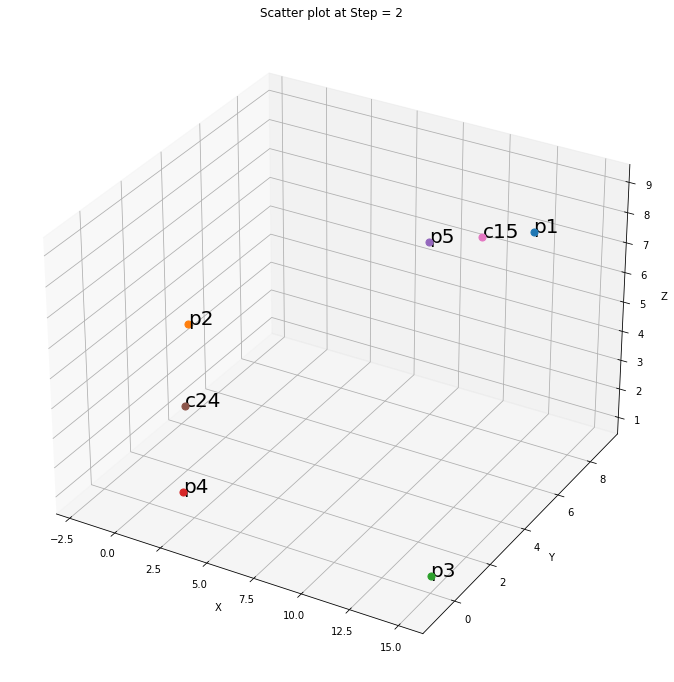

In [84]:
c24 = (p[1]+p[3])/2
points = [p[0],p[1],p[2],p[3],p[4],c24,c15]
names = ['p1','p2','p3','p4','p5','c24','c15']
title = 'Scatter plot at Step = 2 '
plot_points(points,names,title)

<p style = "font-family:georgia;">
    <b><font size="4"> <font color="#A3678F" >  Third Hierarchy Level  </b><font></font>
    </font>    
</p>
    
<font color= #00000><font>
<p style = "font-family:cambria;">
    <font size="3">
        <br>We should <b> choose the cluster with farther points to seperate</b> it to single points <b> between cluster'c15' and cluster 'c24'</b>.<br><br><b>‌p2 & p4 have more distance from one another</b> so we <b>seperate </b> them in M<b> this level and the last seperation ( 'c15' to p1 and p5 remains for the Fourth level hierarchy </b>)


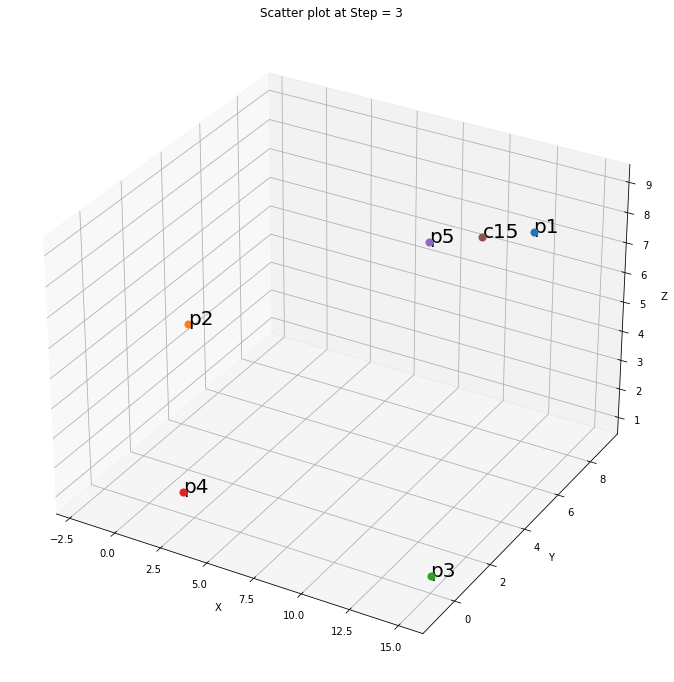

In [86]:
points = [p[0],p[1],p[2],p[3],p[4],c15]
names = ['p1','p2','p3','p4','p5','c15']
title = 'Scatter plot at Step = 3 '
plot_points(points,names,title)

<p style = "font-family:georgia;">
    <b><font size="4"> <font color="#A3678F" >  Fourth Hierarchy Level  </b><font></font>
    </font>    
</p>
    
<font color= #00000><font>
<p style = "font-family:cambria;">
    <font size="3">
        <br>The only cluster reamining is <b>'c15'</b> so we have to <b> divide it into p1 and p5 </b> and now <b> all our points have formed their own single cluster and the Dendogram has reached its leafes </b></b>

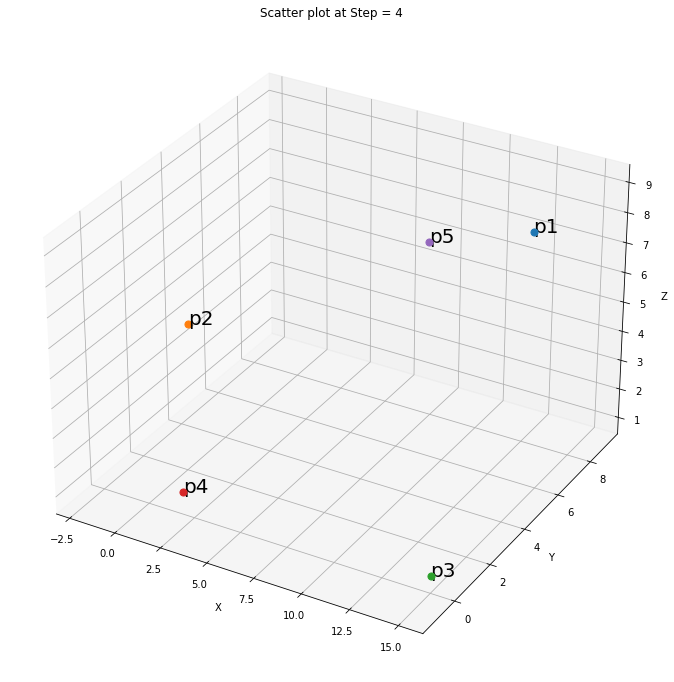

In [87]:
points = [p[0],p[1],p[2],p[3],p[4]]
names = ['p1','p2','p3','p4','p5']
title = 'Scatter plot at Step = 4 '
plot_points(points,names,title)

## Final Dendograms:

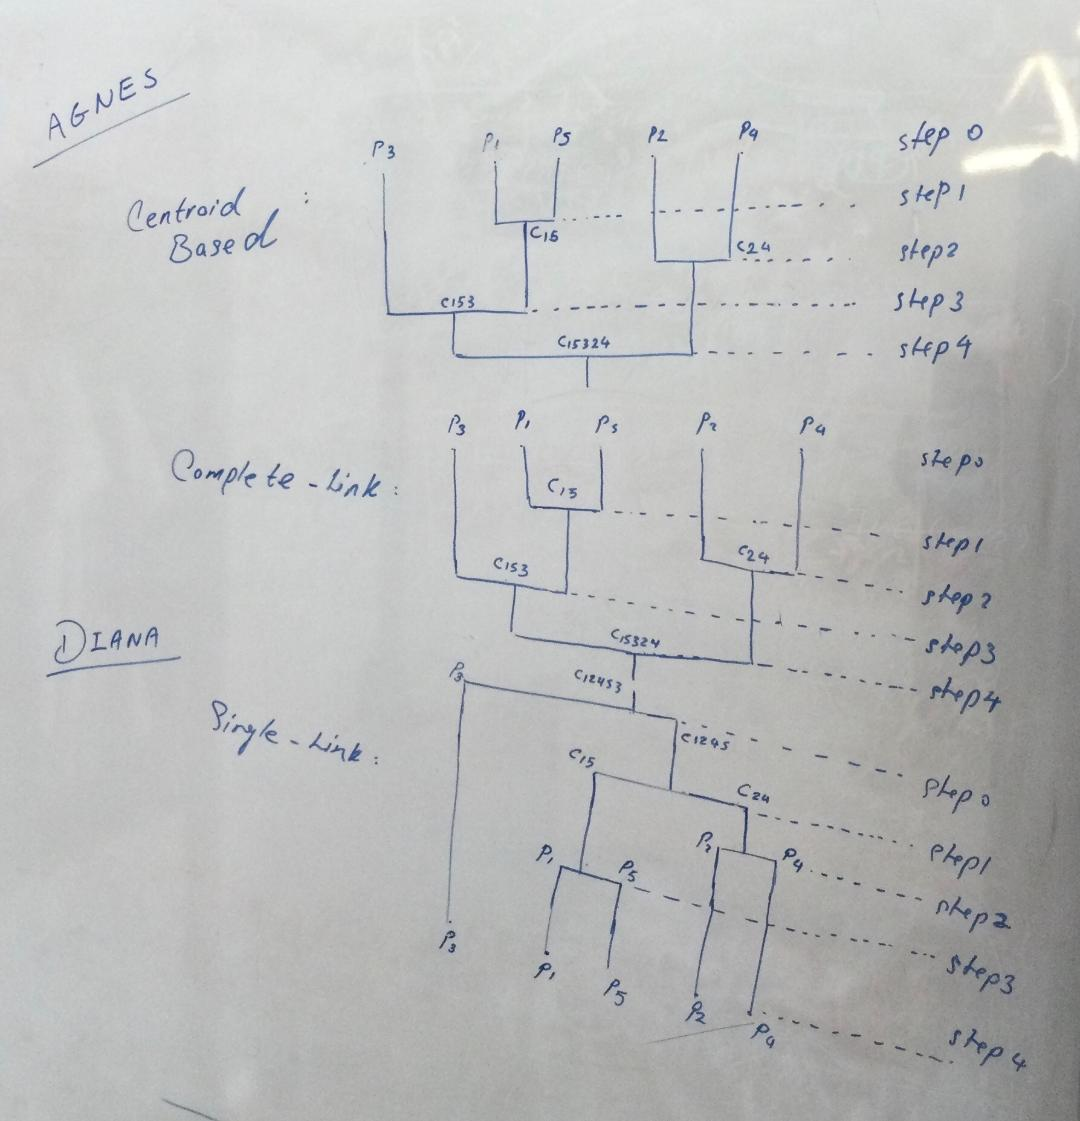

<font color=#0C2C76 ><font>
<p style = "font-family:georgia;">
    <font size="6">
        Q3. Decision Criteria - Loss/Risk Minimization <br><br><font size="5"> 
    </font>    
</p>

<p style = "font-family:georgia;">
    <b><font size="5"> <font color="#D6274F" >  A) Decision based on Loss-Minimization : </b><font></font>
    </font>    
</p><br>

<font color= #00000><font>
<p style = "font-family:cambria;">
    <font size="3">
Both the distributions given in hte question are normal distribution. We remember that a uni-variate noraml distribution has the form below :<br><br>
$${\displaystyle f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}}$$ <br> We should <b> find </b> the <b> criteria point where the two posterior distributions have an equal probability</b><br>
    </p>
<font>
<br><br>$$\mathit{P(w_{1}\mid x) = N\,(\,0,1\,) = {\frac {1}{ {\sqrt {2\pi }}}}e^{-{\frac {x^{2}}{2}}}}\\{P(w_{2}\mid x) = N\,(\,4,2\,) = {\frac {1}{ 2{\sqrt {2\pi }}}}e^{-{\frac {(x-4)^{2}}{8}}}}$$ <br><br>$$\mathit{P(w_{1}\mid x) = P(w_{2}\mid x)\Rightarrow\;}\boxed{\frac {1}{ {\sqrt {2\pi }}}e^{-{\frac {x^{2}}{2}}} = {\frac {1}{ 2{\sqrt {2\pi }}}}e^{-{\frac {(x-4)^{2}}{8}}}}$$<br><br><b>Criteria point</b>:<br> $$\boxed{x_{crt}\;=\;\mathit{\frac{2}{3}(-2 +\sqrt(\ln(64)+16)) \approx  1.6599}}$$<br>$$y\;\approx\;-\,0.1006$$
    
    
<br><br><br><p style = "font-family:georgia;">
    <b><font size="5"> <font color="#D6274F" >  B) Decision based on Risk-Minimization : </b><font></font>
    </font>    
</p><br>
<font color= #00000><font>
<p style = "font-family:cambria;">
    <font size="3">
        <b>Risk Definition:</b><br><br>When we need to <b>highlight the regret of a decision</b>, and <b> type 1 error and type 2 error have different amounts of regret</b> , <b> we can use Risk</b> to <b> make the best decision </b> in these kind of situations.Risk is defined as the following statement:<br><br>
$$\mathit{R(\alpha_{1}\mid x)\;=\;(\,\lambda_{11}\,)\;P(w_{1}\mid x)\;+\;(\,\lambda_{21}\,)\;P(w_{2}\mid x)\;}$$<br>$$\mathit{R(\alpha_{2}\mid x)\;=\;(\,\lambda_{12}\,)\;P(w_{1}\mid x)\;+\;(\,\lambda_{22}\,)\;P(w_{2}\mid x)\;}$$<br>When <b> risk is also included</b> in our problem, we should <b> solve the following equation </b> to find the <b> best criteria which minimizes the risk.</b><br><br>
        
        
${\mathit{if:\;P\,(\,w1\,)\;=\;P\,(\,w2\,)}}$  <br><br>      
${\displaystyle \mathit{\lambda}={\begin{bmatrix}{\lambda_{11}}&{\lambda_{12}}\\{\lambda_{21}}&{\lambda_{22}}\\\end{bmatrix}}\;={\begin{bmatrix}{0}&{2}\\{1}&{0}\end{bmatrix}}}\Rightarrow\;\;(\,\lambda_{12}\,-\,\lambda_{11}\,)\;P(w_{1}\mid x)\;=(\,\lambda_{21}\,-\,\lambda_{22}\,)\;P(w_{2}\mid x)\;\Rightarrow\boxed{\;\;P(w_{2}\mid x)\;=\;2\;P(w_{1}\mid x)\;}$<br><br>$\frac {4}{ {\sqrt {2\pi }}}e^{-{\frac {x^{2}}{2}}} = {\frac {1}{ {\sqrt {2\pi }}}}e^{-{\frac {(x-4)^{2}}{8}}}\rightarrow{\frac{x^{2}}{2} = \frac{\,(\,x-4\,)^{2}}{8} + 2\ln(2) \Rightarrow{\boxed{x_{crt}\,\approx 1.95}}}$

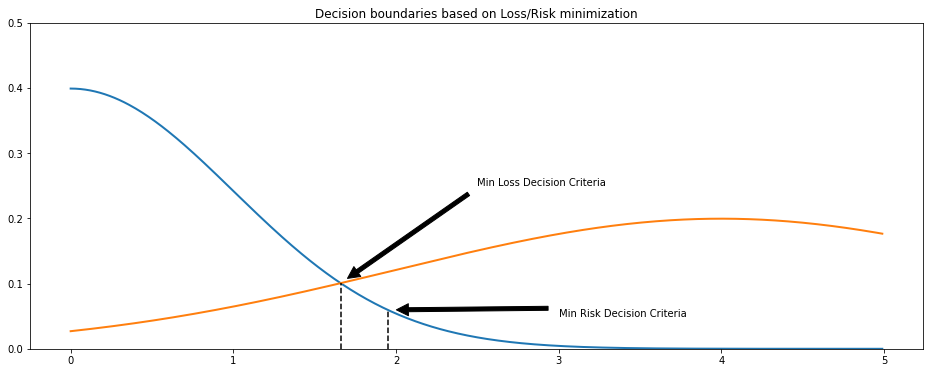

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi 

x = np.arange(0.0, 5.0, 0.01)
f1 = (1/np.sqrt(2*pi))*np.exp(-(x**2)/2)
f2 = (1/(2*np.sqrt(2*pi)))*np.exp(-((x-4)**2)/8)

plt.figure(figsize = (16,6))
plt.plot(x, f1, lw=2)
plt.plot(x, f2, lw=2)

solution_x = 2/3*(-2+np.sqrt(np.log(64)+16))
solution_y = (1/np.sqrt(2*pi))*np.exp(-(solution_x**2)/2)

rx = 1.95
ry = (1/np.sqrt(2*pi))*np.exp(-(rx**2)/2)

plt.axvline(x=solution_x, ymin = 0, ymax = 2*solution_y, linestyle = '--', color = '#000000')
plt.axvline(x=rx, ymin = 0, ymax = 2*ry, linestyle = '--', color = '#000000')

plt.title('Decision boundaries based on Loss/Risk minimization')
plt.annotate('Min Loss Decision Criteria', xy=(solution_x,solution_y), xytext=(2.5, 0.25),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Min Risk Decision Criteria', xy=(rx,ry), xytext=(3, 0.05),arrowprops=dict(facecolor='black', shrink=0.05))


plt.ylim(0,0.5)
plt.show()

<font color=#0C2C76 ><font>
<p style = "font-family:georgia;">
    <font size="6">
        Q4. Naive Bayes - Parameter Estimation <br><br><font size="5"> 
    </font>    
</p>
    
<p style = "font-family:georgia;">
    <b><font size="5"> <font color="#D6274F" >  Fitting Normal Distribution to data - The need of a general model </b><font></font>
    </font>    
</p><br>

<font color= #00000><font>
<p style = "font-family:cambria;">
    <font size="3">
        <b> Developing a Naive-Bayes Model </b> requires some <b> knowledge about the distribution</b> . This knowledge often consists of: <br><br> <b> 1.Initial guess ( prediction ) based on the whole information provided (prior) </b>,<br><br> Ex: We set the <b>  prior</b> distribution in this problem to the <b> ratio of each class in the total labels.</b><br><br><br> <b> 2. General Model for Caculating Likelihood Probability </b><br><br>The <b> second assumption</b>  we have to make before using the <b> Bayes Rule </b> is Data's Distribution family (General Shape) </b>.Most of the times we assume the data is drawn from a <b> Normal Distribution</b> If we dont have prior information about the shape of it. <b> Next we try to fit the normal distribution to the training sample we have drawn </b> by <b> computing the mean and variance. </b> ( The covariance matrix is computed inthe multi-variate case ) <br><br><br> Having the <b> mean vector </b> and <b> covariance matrix </b> we can compute the likelihood and postrior probabilities of each class and decide that each train label belongs to which class based on <b> MAP(prior based) or ML ( evidence based )factors </b> </p><font>
        
<p style = "font-family:georgia;">
    <b><font size="4"> <font color="#D6274F" > <br><br>-  ML Classification using Naive Bayes (Relative Evidence) <br><br> 
 </b><font></font>
    </font>    
</p>       

    
<font color=#0C2C76 ><font>
<p style = "font-family:georgia;">
    <font size="3">
        
$${\displaystyle {\hat {\theta }}_{\mathrm {ML} }(x)={\underset {\theta }{\operatorname {arg\,max} }}\ f(x\mid \theta )}$$<br>
        
<p style = "font-family:georgia;">
    <b><font size="4"> <font color="#D6274F" >-  MAP Classification using Naive Bayes (Belief + Relative Evidence)  </b><font></font>
    </font>    
</p><br><br>
        $${\displaystyle {\hat {\theta }}_{\mathrm {MAP} }(x)={\underset {\theta }{\operatorname {arg\,max} }}\ f(\theta \mid x)={\underset {\theta }{\operatorname {arg\,max} }}\ {\frac {f(x\mid \theta )\,g(\theta )}{\displaystyle \int _{\Theta }f(x\mid \vartheta )\,g(\vartheta )\,d\vartheta }}={\underset {\theta }{\operatorname {arg\,max} }}\ f(x\mid \theta )\,g(\theta ).\!}$$<br><br><br>
    
<font color=#000000 ><font>
<p style = "font-family:cambria;">
    <font size="3">
        In both methods the <b> likelihood function </b>  is computed for <b> all the classes </b> (possible labels) based on the general model <b> (pdf) of the distribution using parameters of the class </b>. <br> <br>Therefore the <b> MAP and ML probabilities </b> represent <b>‌how likely</b>  it is that <b> the data we have drawn, comes from the class with those particular parameters.</b> <br><br>  The likelihood function in our case is a <b> multi variate normal distribution (n= number of features)</b><br><br><br>
$${\displaystyle f(x_{1},\ldots ,x_{n}\mid \mu ,\sigma ^{2})=\prod _{i=1}^{n}f(x_{i}\mid \mu ,\sigma ^{2})=\left({\frac {1}{2\pi \sigma ^{2}}}\right)^{n/2}\exp \left(-{\frac {\sum _{i=1}^{n}(x_{i}-\mu )^{2}}{2\sigma ^{2}}}\right).}$$

    
    
    
    


In [91]:
import pandas as pd
import numpy as np 

train_data = pd.read_csv (r'Q4_Train_Data.csv').to_numpy()  
test_data = pd.read_csv (r'Q4_Test_Data.csv').to_numpy()
train_labels = pd.read_csv(r'Q4_Train_Labels.csv').to_numpy()
test_labels = pd.read_csv(r'Q4_Test_Labels.csv').to_numpy()
#print(np.shape(test_labels))

The function <b>'multivariate_normal' </b> calculates the<b> pdf for a multivariate_normal distribution <b>

In [92]:
from math import pi 

def multivariate_normal_pdf(x,mu,cov):
    n = len(mu)
    mul = np.matmul(((x-mu).T),(np.linalg.inv(cov)))
    mul2 = np.matmul(mul,(x-mu))
    p = (1/((2*pi)**(n/2)))*np.exp(-0.5*mul2)
    return p

cov = np.identity(2)
#multivariate_normal_pdf(np.array([0,0]),np.array([0,0]),cov)

##  Explaining Inner Functions:
-----------------------------------------------------------------------------------------------------------------<br>

### calculate_prior ( labels )  :
This <b> function counts </b>  the <b> labels refering to class i </b>  and <b> divides it by the total number of labels</b>  and represents the result as the <b> prior</b>  probability for class ' i '<br>

### calculate_posterior ( train_data, train_labels, data,data_labels, class_prior ) :
First it <b> calculates the number of classes</b>  by applying the <b> np.unique()</b> function on the labels. After the class numbers are known, the <b> next step </b> is calculating each class paramters to compute the <b> gaussian likelihood </b>. This is done by <b> np.mean( ), np.cov( )</b> Now we can assign the <b> normal pdf</b> as the likelihood function for data <b> We should remember that the variable <b> x </b> is the data we import in our model </b>. It can either be <b> training data or testing data </b>.<br><br> 
 The <b>  main point </b>  is the <b> training data has Developed the Naive Bayes Model by simply estimatiing Normal Distribution parameters</b>  based on the <b> sample mean and sample covariance</b>.<br><br>At the last step we should <b> import data</b>  to our model, and <b> let it predict the MAP class as the predicted label.</b> 
 
### prediction ( posterior, labels ) :
This function Takes the <b> MAP between posterior distribtions</b>  and assigns that to each sample as the <b> prediction </b> for that sample. For the <b> ML </b> case, the <b> posterior</b>  passed to this function is calculated based on <b> multiplying a uniform prior </b> in likelihood that has <b> no effect </b>Therefore <b> MAP performs as ML in this case.</b> Next it <b> calculates the loss of each sample (0-1 loss) and returns the total Acc.

In [93]:
def calculate_prior(labels):
    unique, counts = np.unique(labels, return_counts=True)
    class_prior = counts/len(labels)
    return class_prior

def calculate_posterior(train_data,train_labels,data,data_labels,class_prior):
    class_num = len(np.unique(data_labels))   

    # using training data to derive parameters and generate likelihood:
    
    mu = [np.mean(train_data[train_labels.flatten() == i], axis = 0) for i in range(class_num)]
    cov = [np.cov(train_data[train_labels.flatten() == i].T) for i in range(class_num)]
    
    # using testing data to feed likelihood function and calculate posterior:
    
    posterior = np.zeros(((len(data)),class_num))
    likelihood = np.zeros(((len(data)),class_num))
    
    for i in range(len(data)):
        for j in range(class_num):
            likelihood[i][j] = multivariate_normal_pdf(data[i],mu[j],cov[j])
            posterior[i][j] = likelihood[i][j]*priors[j]
    return posterior


def prediction(posterior,labels):
    loss = np.zeros(len(labels))
    prediction = np.zeros(len(labels))
    
    for i in range(len(labels)):
        prediction[i] = np.argmax(posterior[i])
        loss[i] = (prediction[i] != labels.flatten()[i])
            
    total_loss = np.sum(loss)/len(test_labels)
    acc = 1-total_loss
    return acc,prediction

## Running The Cell Below took about 20-30 minutes!
### I have put the image of the output in '\plots\Q4' in case of output clearance:)

In [94]:
priors = calculate_prior(train_labels)
print(f"Prioirs: {priors}\n\n\n")

default_priors = np.array([0.1]*10)

train_posterior = calculate_posterior(train_data,train_labels,train_data,train_labels,priors)
train_acc,q4_train_predictions = prediction(train_posterior,train_labels)
print(f"Train Accuraccy (With Prior):{train_acc}")

test_posterior = calculate_posterior(train_data,train_labels,test_data,test_labels,priors)
test_acc,q4_test_predictions = prediction(test_posterior,test_labels)
print(f"Test Accuracy (With Prior):{test_acc}")


train_posterior2 = calculate_posterior(train_data,train_labels,train_data,train_labels,default_priors)
train_acc2,a4_train_predictions2 = prediction(train_posterior2,train_labels)
print(f"Train Accuracy (Without Prior):{train_acc2}")


test_posterior2 = calculate_posterior(train_data,train_labels,test_data,test_labels,default_priors)
test_acc2,q4_test_predictions2 = prediction(test_posterior2,test_labels)
print(f"Test Accuracy (Without Prior):{test_acc2}")

Prioirs: [0.09970997 0.10491049 0.10241024 0.09940994 0.09750975 0.09930993
 0.09460946 0.10081008 0.10021002 0.10111011]



Train Accuraccy (With Prior):0.6524721348956846
Test Accuracy (With Prior):0.7602172049156902
Train Accuracy (Without Prior):0.6524721348956846
Test Accuracy (Without Prior):0.7602172049156902


<font color=#000000 ><font>
<p style = "font-family:cambria;">
    <font size="4">
   <b>  We observe that both train and test Acc's for MAP and ML prediction have the same Acc Result !</b><br><br>
        
    
<p style = "font-family:georgia;">
    <b><font size="5"> <font color="#D6274F" >  Why didn't prior belief change our Model Decision(Acc)? </b><font></font>
    </font>    
</p><br>       
    
    
    
<font color=#000000 ><font>
<p style = "font-family:cambria;">
    <font size="3">
        If we look at the <b> Prior Probabilities </b> Printed above we  See they are <b> very close to 0.1</b>, This means The Prior Distribution is Approxiamately Uniform and <b> doesnt provide any prevelance for some class over another .</b> Actually the <b> Decision Criterias ( HyperPlanes ) have moved slightly but not enouph to affect MAP output </b> Though <b> MAP and ML have performed equally in predicting the labels<b> </b><br><br>

In [95]:
def q4_confusion_matrix(predictions,labels):

    labels = convert_element(labels)
    class_num = len(np.unique(labels))
    confusion_matrix = np.zeros((class_num,class_num))
        
    for i in range(len(labels)):
        confusion_matrix[int(labels[i])][int(predictions[i])] = confusion_matrix[int(labels[i])][int(predictions[i])] + 1
    return confusion_matrix



# Showing the "Cnnfusion Matrix":

# WARNING: This cell uses Seaborn library (only for data visualization) and it needs to be installed on your system first!


import seaborn as sn

def q4_show_confusion_matrix(cm,title,color="BuPu"):
    
    df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],columns = [i for i in "0123456789"])

    plt.figure(figsize = (20,14))
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.title(title)
    sn.heatmap(df_cm, annot=True,cmap = color,fmt ='2g')
    plt.show()

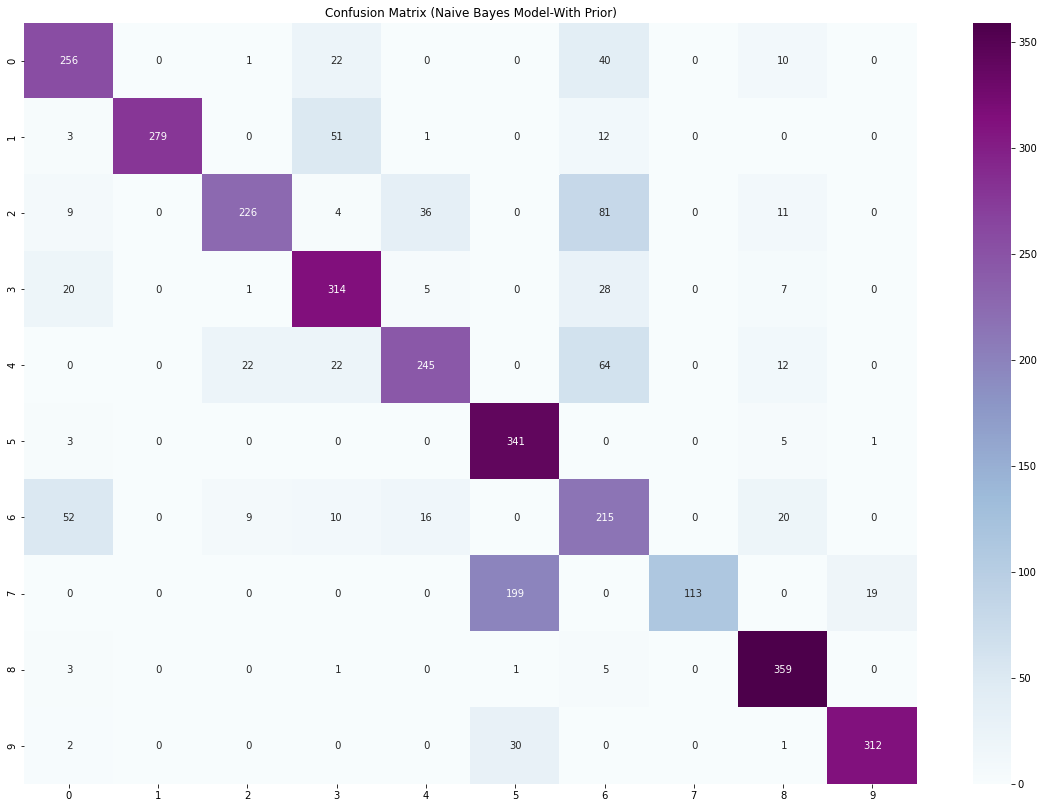

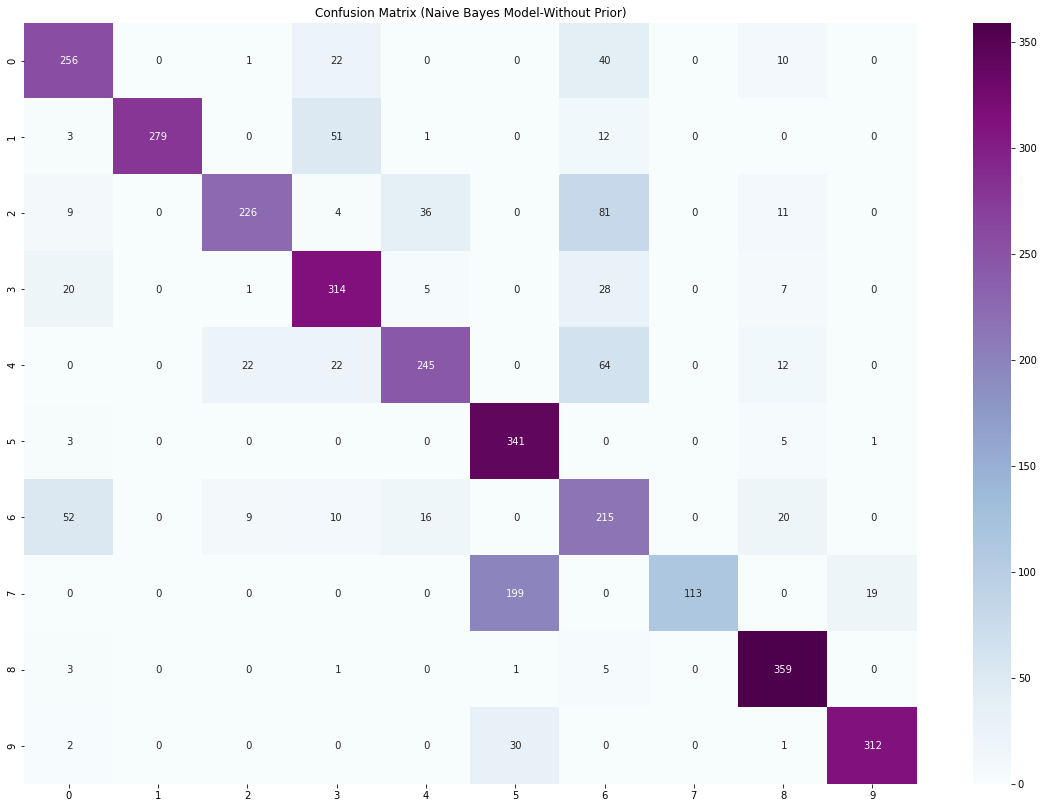

In [96]:
#print(f"Predictions: {q4_test_predictions}\n\nLabels: {test_labels}")
q4_cm = q4_confusion_matrix(q4_test_predictions,test_labels)
q4_show_confusion_matrix(q4_cm,"Confusion Matrix (Naive Bayes Model-With Prior)")
q4_cm_p = q4_confusion_matrix(q4_test_predictions2,test_labels)
q4_show_confusion_matrix(q4_cm_p,"Confusion Matrix (Naive Bayes Model-Without Prior)")


<font color=#000000 ><font>
<p style = "font-family:cambria;">
    <font size="3">
        <br> <b> The Confusion Matrices are exactly the same, as I explained the reason above </b>  </b><br><br>

<font color=#0C2C76 ><font>
<p style = "font-family:georgia;">
    <font size="6">
        Q5. Naive-Bayes - Income Prediction <br><br><font size="5"> 
    </font>    
</p>

In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random as rd

data = pd.read_csv (r'income_Q5.csv')

In [257]:
def splitting(data,partition):
    splitted_data = []
    #print(splitted_data)
    len_splitted = [0]*len(partition)
    # Train and Test Partitioning:
    for i in range(len(partition)):
        len_splitted[i] = int(np.round(len(data)*partition[i]))
        #print(f"Len Partition : {len_splitted[i]}")
        #print(f"range : {len_splitted[i-1]} , {len_splitted[i]+len_splitted[i-1]}")
        splitted_data.append(data[len_splitted[i-1]:(len_splitted[i-1]+ len_splitted[i])])
        #print(f" Splitted Data Length : {len(splitted_data[i])}")
    return splitted_data

In [258]:
def calculate_prior(labels):
    unique, counts = np.unique(labels, return_counts=True)
    class_prior = counts/len(labels)
    return class_prior

priors = calculate_prior(train_labels)

In [512]:
#print(np.unique(train_labels))
#print(np.where(train_labels==">50K"))
def likelihoods(data,labels):
    max_feature_variety = max([len(np.unique(data[:,i])) for i in range(len(data[0]))])
    
    # likelihood dimension sizes:
    x = len(data[0]) # column size
    y = max_feature_variety # max feature_values in column
    z = len(np.unique(labels)) # label size
    
    likelihoods = np.zeros((x, y, z))
    lh_nA = np.zeros((x, y, z))
    lh_nS = np.zeros(z)

    #print(f"Likelihood Tensor Shape: {np.shape(likelihoods)}\n")
    
    Feature_List = [[]]

    # locate column:
    for c in range(x):
        column = data[:,c]
        
        # locate unique features in that column:
        for f,feature_values in zip(range(len(np.unique(column))), np.unique(column)):
            Feature_List[c].append(feature_values)
            # locate rows in that column containing this specific feature:
            rows = np.where(column == feature_values)
    
            for l,label in zip(range(z), np.unique(labels)):
                #print(f"\n\n\n\ncolumn  #{c}, feature type  #{f}, label class  #{l}:\n\n")


                # locate labels of corresponding rows 
                lh_nA[c][f][l] = np.shape(np.where(labels[rows]==label))[1]
                lh_nS[l] = np.shape(np.where(labels==label))[1]
                
                          
                #likelihoods[c][f][l] = lh_nA/lh_nS
                
                    
                #print(f"Likelihood c{c}f{f}|l{l} = {likelihoods[c][f][l]}")
            #print(F"Feature List : {Feature_List}\n\n\n")  
            Feature_List.append([])
            
    return lh_nA,lh_nS,Feature_List

nA,nS,feature_list = likelihoods(train_data,train_labels)

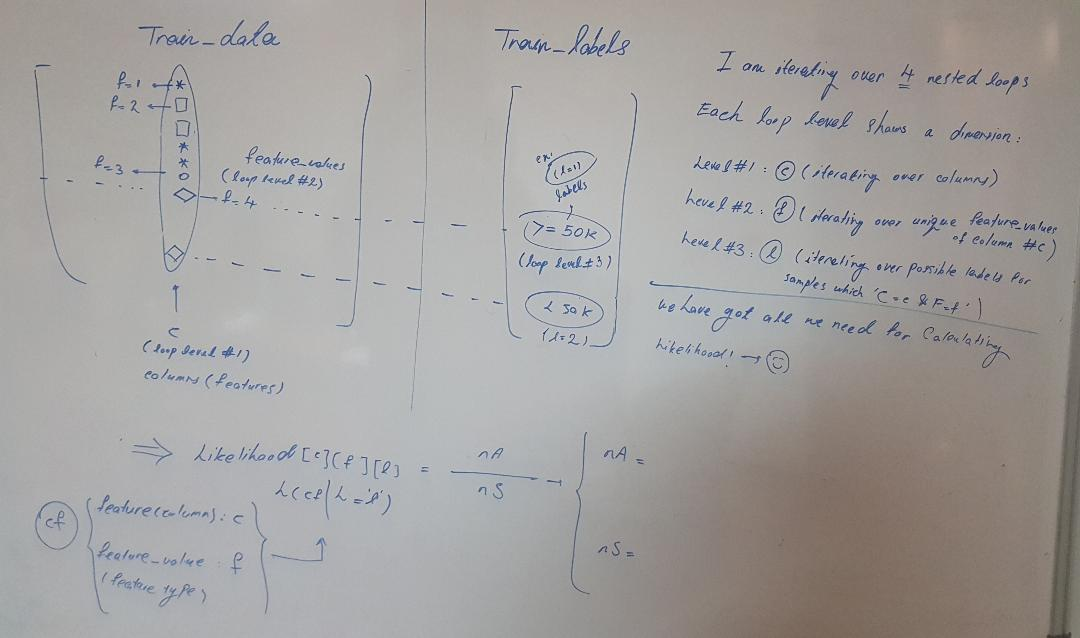

In [429]:
def q5_prediction(data,labels,priors,lh_nA,lh_nS,Feature_List,smoothing= False, alpha=0):
    
    posteriors = np.zeros((len(labels),len(np.unique(labels))))
    predictions = []
    loss = 0
    smt_done = False
    
    # moving along samples(rows):
    
    for r in range(len(data)):
        sample = data[r]
        # iterating over labels, calculating likelihood
        for l in range(len(np.unique(labels))):
            temp = 1
            # iterating over sample's features:
            for c in range(len(data[r])):
                feature = data[r][c]

                if(feature in Feature_List[c]):

                    # locating feature location in Feature List:
                    f = Feature_List[c].index(feature)
                    temp  = temp * ((alpha+lh_nA[c][f][l])/(len(data[r])*alpha + lh_nS[l]))
                    
                else:
                    if((smoothing == False) and (smt_done == False)):
                        print("New Feature Detected!\n Smoothing Recommended!\n\nAuto Smoothing with alpha = 5 ...\n")
                        acc, predictions,posteriors = q5_prediction(data,labels,priors,lh_nA,lh_nS,Feature_List,smoothing= "True", alpha=5)
                        smt_done = True
                        
                        acc2 = q5_prediction(data,labels,priors,lh_nA,lh_nS,Feature_List,smoothing= "False", alpha=0)[0]
                        print(f"\nAcc without Smoothing: {acc2}\n")
                        return acc,predictions,posteriors
                    
                    
                    else:
                        temp  = temp * ((alpha)/(len(data[r])*alpha + lh_nS[l]))
            posteriors[r][l] = temp*priors[l]

        predictions.append(np.unique(labels)[np.argmax(posteriors[r])])
        loss = loss + (labels[r]!=predictions[r])
        
    acc = 1-(loss/len(labels))
    return acc,predictions,posteriors

In [430]:
def naive_bayes(train_data,train_labels,test_data,test_labels,smoothing=False,alpha=0):
    nA,nS,feature_list = likelihoods(train_data,train_labels)
    test_acc, test_predictions, test_posteriors = q5_prediction(test_data,test_labels,priors,nA,nS,feature_list,smoothing = "True")
    return test_acc,test_predictions

<p style = "font-family:georgia;">
    <b><font size="4"> <font color="#D6274F" > Shuffling and Splitting Data </b><font></font>
    </font>    
</p><br>  

In [488]:
#print(f"Data\n\n{data}\n\n\n")

# Shuffling data:
shuffled_data = data.sample(frac = 1)
shuffled_data = data.sample(frac = 1).to_numpy()

#print(f"\n\n\nShuffled Data\n\n{data_shuffled}")
#print(np.shape(data))

test_data,train_data = splitting(shuffled_data,[0.2,0.8])

#print(len(train_data))
#print(len(test_data))

train_labels, train_data = train_data[:,-1], train_data[:,:-1]
test_labels, test_data = test_data[:,-1], test_data[:,:-1]

 The data is <b> shuffled randomly and the need for laplace smoothing may exist or not!</b>  according to how feature values are splitted between test and train data. <b> This need is detected in the prediction function </b> by checking whether each feature it observes in testing data is in the Feature list created by likelihood function based on training set or not!

In [304]:
results = naive_bayes(train_data,train_labels,test_data,test_labels)
test_acc = results[0]
test_predictions = results[1]
print(f"Test Acc: {test_acc}")

Test Acc: 0.8151105651105651


In [330]:
def q5_confusion_matrix(predictions,labels):
    

    class_num = len(np.unique(labels))
    confusion_matrix = np.zeros((class_num,class_num))
    for i in range(len(labels)):
        xloc = np.where(np.unique(labels) == predictions[i])[0][0]
        yloc = np.where(np.unique(labels) == labels[i])[0][0]
        
        confusion_matrix[xloc][yloc] = confusion_matrix[xloc][yloc] + 1

    return confusion_matrix

cm5 = q5_confusion_matrix(test_predictions,test_labels)


(2, 2)


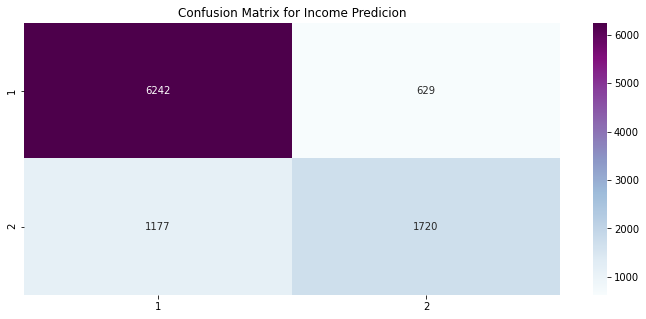

In [336]:
# Showing the "Cnnfusion Matrix":

# WARNING: This cell uses Seaborn library (only for data visualization) and it needs to be installed on your system first!


import seaborn as sn

def q5_show_confusion_matrix(cm,title,color="BuPu"):
    
    df_cm = pd.DataFrame(cm, index = [i for i in "12"],columns = [i for i in "12"])
    plt.figure(figsize = (12,5))
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.title(title)
    sn.heatmap(df_cm, annot=True,cmap=color,fmt = '2g')
    plt.show()
    
    
q5_show_confusion_matrix(cm5,"Confusion Matrix for Income Predicion")

<font color= #00000><font>
<p style = "font-family:cambria;">
    <font size="3"> 
        As we can see <b> Laplace Smoothing with alpha = 5</b>  has smoothed the data (If unseen Features have occured).<b> But the improvement is very small and its because in the whole testing data the need for laplace smoothing (Unseen Features) Happens 2 or 3 times. In <b> more variate datasets </b> this improvement is more distinguishable </b> 

<p style = "font-family:georgia;">
    <b><font size="5"> <font color="#D6274F" > Laplace Smoothing - How to deal with unseen feature values? </b><font></font>
    </font>    
</p><br>  

<p style = "font-family:georgia;">
    <b><font size="4"> <font color="#D6274F" > Motivation and Importance </b><font></font>
    </font>    
</p><br>  
        
<font color= #00000><font>
<p style = "font-family:cambria;">
    <font size="3"> 
        There are times where a <b> new feature value</b>  that the <b> training set doesn't require appears in test data.</b> As there is <b> no likelihood calculated for this feature value (n(A) = 0)</b> , Therefore this feature will have a <b> conditional probability of 0 with respect to all labels</b> ,that makes the <b> final posterior probability for all labels with respect to the sample ( row ), containing the new feature value smash down to 0</b> , making <b> MAP</b>  decision making act in a <b> useless random fashion</b> . and this can mess things up quite a bit <b> when feature value variety is large</b> and the problem mentioned, is quite likely to happen.  
<br><br>
$${\displaystyle {\hat {\theta }}_{\mathrm {MAP} }(X)={\underset {\theta }{\operatorname {arg\,max} }}\ L(X\mid \theta )\,Pr(\theta )}\overset{Assuming\;Conditional\;Independence}{\rightarrow}\;= {\operatorname {arg\,max}(\,\prod_{i = 1}^{n_{c}}L(x_{i}\mid \theta )\,\,)\,Pr(\theta )}$$<br><br>Let <b> X be a sample </b> and <b> theta the label or parameters corresponding to the class distribution </b>‌:<br><br>If <b> at least one unseen feature value</b> occures in a sample:<br><br>$$\mathit{\exists {x_{i}}\mid L(x_{i}\mid \theta ) = 0 \Rightarrow \boxed{L\,(\,X\mid \theta\,) = 0}}$$<br><br>
        
        
<p style = "font-family:georgia;">
    <b><font size="4"> <font color="#D6274F" > Fixing the Problem, Laplace Smoothing Implementation: </b><font></font>
    </font>    
</p><br> 
    
$$\mathit{\hat {\theta }}_{i}={\frac {x_{i}+\alpha }{N+\alpha n_{c}}}\qquad (i=1,\ldots ,n_{c})$$
    
<font color= #00000><font>
<p style = "font-family:cambria;">
    <font size="3"> 
        It is <b> very important to imply laplace smoothing on every feature value,</b> refardless of they are seen before or not! Yes <b> we are correcting the Unseen Feature Value Likelihood terms</b>  But we <b> shouldnt make them big enough to overcome higher likelihoods and bias our model!</b>

<p style = "font-family:georgia;">
    <b><font size="5"> <font color="#D6274F" > Reducing Random Effects, Averaging Acc over epochs:</b><font></font>
    </font>    
</p><br> 

In [337]:
# running multiple epochs and averagin to decrease acc dependancy on shuffle output:
shuffle_times = 5 

epoch_accs = []

for e in range(shuffle_times):
    
    # shuffling 2 times in each epoch :
    data = data.sample(frac = 1)
    numpy_data = data.sample(frac = 1).to_numpy()

    # splitting test and train
    test_data,train_data = splitting(numpy_data,[0.2,0.8])

    #print(len(train_data))
    #print(len(test_data))

    train_labels, train_data = train_data[:,-1], train_data[:,:-1]
    test_labels, test_data = test_data[:,-1], test_data[:,:-1]
    
    test_acc = naive_bayes(train_data,train_labels,test_data,test_labels)[0]
    print(f"Test Acc for epoch #{e}: {test_acc}")
    epoch_accs.append(test_acc)
 

print(f"\n\nMean Test Acc: {sum(epoch_accs)/len(epoch_accs)}")

Test Acc for epoch #0: 0.8085585585585586
Test Acc for epoch #1: 0.8071253071253071
Test Acc for epoch #2: 0.8122440622440622
Test Acc for epoch #3: 0.812960687960688
Test Acc for epoch #4: 0.8042588042588042


Mean Test Acc: 0.809029484029484


<br><br><br> <p style = "font-family:georgia;">
    <b><font size="6"> <font color="#D6274F" > Trying to Improve Acc.</b><font></font>
    </font>    
</p>


<br> <p style = "font-family:georgia;">
    <b><font size="5"> <font color="#D6274F" > Data Imputation - Handling Missing Attributes</b><font></font>
    </font>    
</p>

<font color= #00000><font>
<p style = "font-family:cambria;">
    <font size="3"> 
 By having a closer look at our data we recognize <b> there's a column (Feature) where some feature values are missing ( indicated by '?' ) : The Occupation Column. </b> We can go further and write a function that gets data and outputs the columns (features) with missing attributes (indicated by '?' or None). This can be very useful as a <b> part of pre-processing data </b>  but we will focus on <b> how to handle the missing data for now. </b> <br><br> <b> There are many main in data imputaion but i will test these 3 approaches learned in decision tree lectures:<br></b><br><br><b> 1. Eliminating the samples containing missing data</b> (This is not an appropriate way for dealing datasets with a lot of missing attributes)<br><br><b> 2. Assigning most common feature values of the feature</b> (among <u> whole data </u>or <u> same-class(similar) data </u><br><br><b> 3.Assigning Feature values in a Probabilistic Fashion</b> (Random(Uniform) or based on Occurance Frequency of other values) - (among whole data / same-class)<br><br>Each of these approaches will be examined on the data and we will compare the results.

In [433]:
def find_samples_with_missing_attributes(data,labels):
    samples = [] 
    for r in range(len(data)):
        if(("?"or None) in data[r]):
            samples.append(r)
    return samples

# train data : 

# finding samples with missing attributes
train_missing_att_samples = find_samples_with_missing_attributes(train_data,train_labels)
train_missing_portion = len(train_missing_att_samples)/len(train_data)

print(f"{train_missing_portion*100}% of train data samples have missing feature values (attributes)!\n")

# test data :

# finding samples with missing attributes
test_missing_att_samples = find_samples_with_missing_attributes(test_data,test_labels)
test_missing_portion = len(test_missing_att_samples)/len(test_data)

print(f"{test_missing_portion*100}% of test data samples have missing feature values (attributes)!\n")

7.442288990121308% of train data samples have missing feature values (attributes)!

7.28910728910729% of test data samples have missing feature values (attributes)!



<p style = "font-family:georgia;">
    <b><font size="4"> <font color="#D6274F" > a) Eliminating Samples containing missing attributes </b><font></font>
    </font>    
</p>

In [440]:
# eliminating train samples :
new_train_data = np.delete(train_data,train_missing_att_samples,axis = 0)
new_train_labels = np.delete(train_labels,train_missing_att_samples,axis = 0)


# eliminating test samples :
new_test_data = np.delete(test_data,test_missing_att_samples,axis = 0)
new_test_labels = np.delete(test_labels,test_missing_att_samples,axis = 0)

## Can and Should we Impute test data as well as train data?

 Mathematically,<b>  no problem will occur if we impute test data too </b> but if the imputation technique used is <b> sample elimination most people prefer not too eliminate test samples as they are real world examples and subjects in the real world</b><br><br> Imagine Eliminating a patients data only for missing one test result among dozens of attributes! <b> That would not be good,</b>  especially for <b> medical cases where missing data is a frequent problem!</b>

In [439]:
test_acc, test_predictions = naive_bayes(train_data,train_labels,test_data,test_labels)
print(f"Acc before Imputation: {test_acc}")

Acc before Imputation: 0.8042588042588042


In [438]:
new_test_acc, new_test_predictions = naive_bayes(new_train_data,new_train_labels,test_data,test_labels)
print(f"Acc after Imputation: {new_test_acc}")

Acc after Imputation: 0.8081490581490581


<b>  Eliminating samples with missing attributes</b> <b> didn't improve accuracy, a lot! </b> , this may be because of <b> throwing away a meaningful amount of information gained by other feature values </b> in samples with the missing attribute or<b>  can be caused if the missing attribute is too noisy or correlated that provides no information gain </b> that we will see the feature information gain(distortions) later

<p style = "font-family:georgia;">
    <b><font size="4"> <font color="#D6274F" > b) Using Most common values  </b><font></font>
    </font>    
</p>
    
    
<br> 1. Using Most common value among<b>‌ whole data </b> for data imputation:

In [469]:
new_train_data = np.copy(train_data)
print(len(train_missing_att_samples))
for i in train_missing_att_samples:        
    #finding columns with missing attributes 
    mc = np.where(train_data[i]=='?')[0][0]
    #print(list(train_data[:,mc]))
    #train_data[i][mc] = np.argmax(np.bincount(train_data[:,mc]))
    maxpos = np.bincount(np.unique(train_data[:,mc],return_inverse=True)[1]).argmax() #Finds all unique elements and their positions
    new_train_data[i][mc] = train_data[maxpos][mc]

2908


In [471]:
new_test_acc, new_test_predictions = naive_bayes(new_train_data,train_labels,test_data,test_labels)
print(f"Acc after Imputation: {new_test_acc}")

Acc after Imputation: 0.8069205569205569


2. Using Most common value among<b> data with similar labels </b> for data imputation:

In [473]:
new_train_data = np.copy(train_data)
print(len(train_missing_att_samples))
for i in train_missing_att_samples:        
    #finding columns with missing attributes 
    mc = np.where(train_data[i]=='?')[0][0]
    #print(list(train_data[:,mc]))
    #train_data[i][mc] = np.argmax(np.bincount(train_data[:,mc]))
    maxpos = np.bincount(np.unique(train_data[np.where(train_labels == train_labels[i]),mc],return_inverse=True)[1]).argmax() #Finds all unique elements and their positions
    new_train_data[i][mc] = train_data[maxpos][mc]

2908


In [474]:
new_test_acc, new_test_predictions = naive_bayes(new_train_data,train_labels,test_data,test_labels)
print(f"Acc after Imputation: {new_test_acc}")

Acc after Imputation: 0.8032350532350532


Neither of the two techniques used above improved the Test.Acc :(

<br> <p style = "font-family:georgia;">
    <b><font size="5"> <font color="#D6274F" > Feature Selection </b><font></font>
    </font>    
</p>
    
    
<br> <p style = "font-family:georgia;">
    <b><font size="4"> <font color="#D6274F" > a) Detecting Noisy Features by computing Acc. Loss after shuffling Feature </b><font></font>
    </font>    
</p>
    
    

In [496]:
#print(f"Data\n\n{data}\n\n\n")

# Shuffling data:
shuffled_data = data.sample(frac = 1)
shuffled_data = data.sample(frac = 1).to_numpy()

#print(f"\n\n\nShuffled Data\n\n{data_shuffled}")
#print(np.shape(data))

test_data,train_data = splitting(shuffled_data,[0.2,0.8])

#print(len(train_data))
#print(len(test_data))

train_labels, train_data = train_data[:,-1], train_data[:,:-1]
test_labels, test_data = test_data[:,-1], test_data[:,:-1]

In [497]:
def shuffle_feature(data,column):
    new_data =np.copy(data)
    np.random.shuffle(new_data[:,column])
    return new_data

new_train_data = shuffle_feature(train_data,0)
print(train_data[:,0])
print(new_train_data[:,0])

['<=38' '<=38' '>38' ... '<=38' '>38' '<=38']
['<=38' '>38' '<=38' ... '>38' '>38' '<=38']


In [515]:
test_acc, test_predictions = naive_bayes(train_data,train_labels,test_data,test_labels)
print(f"Acc before Shuffling Feature : {test_acc}")

Acc before Shuffling Feature : 0.8063063063063063


<b> Shuffling is a stochastic process </b> and every thing that's Stochastic<b> needs to be averaged over epochs to decrease random effect</b> 

In [506]:
Mean_test_accs = []
epochs = 5

for f in range(len(train_data[0])):
    new_test_accs = []
    
    for e in range(epochs):
    
        new_train_data = shuffle_feature(train_data,f)
        new_test_acc, new_test_predictions = naive_bayes(new_train_data,train_labels,test_data,test_labels)
        new_test_accs.append(new_test_acc)
        
    mean_test_acc = sum(new_test_accs)/len(new_test_accs)
    Mean_test_accs.append(mean_test_acc)
print(Mean_test_accs)
Sorted_Mean_test_accs = np.argsort(Mean_test_accs)
print(Sorted_Mean_test_accs)
#print(f"Mean Acc Decrease after Shuffling Feature {f} over {epoch} Epochs: {new_test_acc-test_acc}\n\n")

[0.8106060606060606, 0.8080057330057329, 0.787018837018837, 0.7967444717444717, 0.8153153153153154, 0.7982596232596233, 0.8181613431613431, 0.8038902538902539, 0.8126330876330876, 0.8055282555282556]
[2 3 5 7 9 1 0 8 4 6]


The <b> highest test acc </b>  is after shuffling the <b> Seventh Feature (Relationship) </b>.Meaning that <b> 'Realtionship" Status Doesn't affect income much </b> and it may be a good idea to remove this feature to <b> prevent the naive bayes model being too muched biased to noisy data</b>  We will <b> test deleting this column in train and test data </b> 

In [516]:
new_train_data = np.delete(train_data,6,axis = 1)
new_test_data = np.delete(test_data,6,axis = 1)

new_test_acc, new_test_predictions = naive_bayes(new_train_data,train_labels,new_test_data,test_labels)
print(f"Acc after Deleting Relationship Feature: {new_test_acc}")

Acc after Deleting Relationship Feature: 0.8185913185913186


<b> Acc is improved  about 1.5% </b> by <b> removing the 'Relationship' feature</b>  which was <b> quite a noisy feature</b>. We will now <b> examine removing the next noisy Feature which is the Fifth Feature ("marital status")</b>